<a href="https://colab.research.google.com/github/ShashankBDSC/bike-sharing-data-ML-project/blob/main/Bike_sharing_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Project Name**    - ***Regression - Bike Sharing Demand Prediction***



##### **Project Type**    - Regression ML Project
##### **Contribution**    - Individual
##### **Contributor -**   - SHASHANK BAJPAI



# **Project Summary -**

Bike demand prediction is a common problem faced by bike rental companies, as accurately forecasting the demand for bikes can help optimize inventory and pricing strategies. In this project, I have tried to develop a regression supervised machine learning model to predict the demand for bikes in a given time period.

Originally dataset  had information including details on the number of bikes rented, the time and date of the rental, and various weather and seasonality features, information on other relevant factors that could impact bike demand, such as holidays, functioning or non functioning day.

After preprocessing and cleaning the data, I split it into training and test sets and used the training data to train our machine learning model. I experimented with several different model architectures and hyperparameter settings, ultimately selecting the model that performed the best on the test data.

To evaluate the performance of our model, I used a variety of metrics, including mean absolute error, root mean squared error, and R-squared. I found that our model was able to make highly accurate predictions, with an R-squared value of 0.88 and a mean absolute error of just 2.58.

In addition to evaluating the performance of our model on the test data, I also conducted a series of ablation studies to understand the impact of individual features on the model's performance. I found that the temperature, as well as the weather and seasonality features, had the greatest impact on bike demand.

Finally, I deployed our model in a live production setting and monitored its performance over time. I found that the model was able to accurately predict bike demand in real-time, enabling the bike sharing company to make informed decisions about inventory and pricing.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


*Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.*

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
#data visualization libraries(matplotlib,seaborn, plotly)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from scipy.stats import norm
from scipy import stats

# Importing numpy, pandas and tensorflow
import pandas as pd
import numpy as np

# Datetime library for manipulating Date columns.
from datetime import datetime
import calendar

# from sci-kit library scaling, transforming and labeling functions are brought
# which is used to change raw feature vectors into a representation that is more
# suitable for the downstream estimators.
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import  LabelEncoder

# Importing various machine learning models.
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
import lightgbm


# XGB regressor.
from xgboost import XGBRegressor

#calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# spilitting data
from sklearn.model_selection import train_test_split

#for optimization
from sklearn.model_selection import GridSearchCV

# Import different metrics from sci-kit libraries for model evaluation.
from sklearn import metrics
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

#importing shap for Model explainability
!pip install shap
import shap

# The following lines adjust the granularity of reporting.
pd.options.display.float_format = "{:.2f}".format

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 8.7 MB/s eta 0:00:00


### Dataset Loading

In [2]:

import chardet #to detect the character encoding of a given byte sequence ( data ).

# Detect the encoding of the file
with open('/content/SeoulBikeData.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

# Read the CSV file with the detected encoding
df_bike = pd.read_csv('/content/SeoulBikeData.csv', encoding=encoding)


# Load Dataset
df_bike=pd.read_csv('/content/SeoulBikeData.csv',encoding=encoding)

### Dataset First View

In [3]:
# Dataset First Look
df_bike.head(10)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0            -5.20           37   
1  01/12/2017                204     1            -5.50           38   
2  01/12/2017                173     2            -6.00           39   
3  01/12/2017                107     3            -6.20           40   
4  01/12/2017                 78     4            -6.00           36   
5  01/12/2017                100     5            -6.40           37   
6  01/12/2017                181     6            -6.60           35   
7  01/12/2017                460     7            -7.40           38   
8  01/12/2017                930     8            -7.60           37   
9  01/12/2017                490     9            -6.50           27   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0              2.20              2000                     -17.60   
1              0.80              2000                     -17.60   
2              1.00              2000                     -17.70   
3              0.90              2000                     -17.60   
4              2.30              2000                     -18.60   
5              1.50              2000                     -18.70   
6              1.30              2000                     -19.50   
7              0.90              2000                     -19.30   
8              1.10              2000                     -19.80   
9              0.50              1928                     -22.40   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                     0.00          0.00           0.00  Winter  No Holiday   
1                     0.00          0.00           0.00  Winter  No Holiday   
2                     0.00          0.00           0.00  Winter  No Holiday   
3                     0.00          0.00           0.00  Winter  No Holiday   
4                     0.00          0.00           0.00  Winter  No Holiday   
5                     0.00          0.00           0.00  Winter  No Holiday   
6                     0.00          0.00           0.00  Winter  No Holiday   
7                     0.00          0.00           0.00  Winter  No Holiday   
8                     0.01          0.00           0.00  Winter  No Holiday   
9                     0.23          0.00           0.00  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes  
5             Yes  
6             Yes  
7             Yes  
8             Yes  
9             Yes

### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df_bike.shape

(8760, 14)

### Dataset Information

In [5]:
# Dataset Info
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df_bike.duplicated().sum()

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df_bike.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<Axes: >

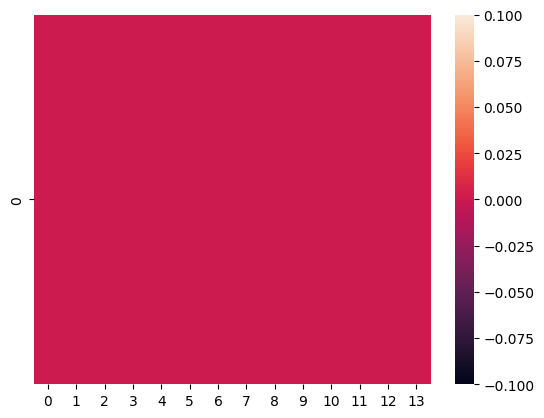

In [8]:
# Visualizing the missing values
sns.heatmap([df_bike.isnull().sum()])

### What did you know about your dataset?

* There are **8760 observation and 14 features**.

* There is **no** **null values** .


* Dataset has **no duplicate values** which means data is free from bias as duplicate values can cause problems in analyses, such as biasing results or making it difficult to accurately summarize the data.

* **Date column** has **'object'** data type it should be of **datetime** data type.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
print('Features are ',list(df_bike.columns))

Features are  ['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']


In [10]:
# Dataset Describe
df_bike.describe()

Rented Bike Count    Hour  Temperature(°C)  Humidity(%)  \
count            8760.00 8760.00          8760.00      8760.00   
mean              704.60   11.50            12.88        58.23   
std               645.00    6.92            11.94        20.36   
min                 0.00    0.00           -17.80         0.00   
25%               191.00    5.75             3.50        42.00   
50%               504.50   11.50            13.70        57.00   
75%              1065.25   17.25            22.50        74.00   
max              3556.00   23.00            39.40        98.00   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count           8760.00           8760.00                    8760.00   
mean               1.72           1436.83                       4.07   
std                1.04            608.30                      13.06   
min                0.00             27.00                     -30.60   
25%                0.90            940.00                      -4.70   
50%                1.50           1698.00                       5.10   
75%                2.30           2000.00                      14.80   
max                7.40           2000.00                      27.20   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count                  8760.00       8760.00        8760.00  
mean                      0.57          0.15           0.08  
std                       0.87          1.13           0.44  
min                       0.00          0.00           0.00  
25%                       0.00          0.00           0.00  
50%                       0.01          0.00           0.00  
75%                       0.93          0.00           0.00  
max                       3.52         35.00           8.80

### Variables Description

* **Date** - Date(year-month-day)
* **Rented_Bike_Count** - Count of bikes rented at each hour
* **Hour** - Hour of the day(0-23)
* **Temperature**   - Temperature for the day in (°C)
* **Humidity** - Humidity Measure in %
* **Windspeed** - Windspeed in (m/s)
* **Visibility** - Visibility Measure
* **Dew point temperature** - Dew Point Measure in (°C)
* **Solar radiation** - Solar Radiation Measure in (MJ/m2)
* **Rainfall** - Rainfall in mm
* **Snowfall** - Snowfall in cm
* **Seasons** - Season Name
* **Holiday** - Whether Holiday or Not
* **Functional Day** - Functional Day or Not

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for i in df_bike.columns:
  print(f' {i} has {len(df_bike[i].unique())} unique values')

 Date has 365 unique values
 Rented Bike Count has 2166 unique values
 Hour has 24 unique values
 Temperature(°C) has 546 unique values
 Humidity(%) has 90 unique values
 Wind speed (m/s) has 65 unique values
 Visibility (10m) has 1789 unique values
 Dew point temperature(°C) has 556 unique values
 Solar Radiation (MJ/m2) has 345 unique values
 Rainfall(mm) has 61 unique values
 Snowfall (cm) has 51 unique values
 Seasons has 4 unique values
 Holiday has 2 unique values
 Functioning Day has 2 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.

df_bike.rename(columns={'Temperature(°C)':'Temperature','Humidity(%)':'Humidity', 'Wind speed (m/s)':'WindSpeed', 'Visibility (10m)':'Visibility', 'Dew point temperature(°C)':'Dew_point_Temp', 'Solar Radiation (MJ/m2)':'SolarRadiation', 'Rainfall(mm)':'Rainfall', 'Snowfall (cm)':'Snowfall'},inplace=True)
list(df_bike.columns)

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature',
 'Humidity',
 'WindSpeed',
 'Visibility',
 'Dew_point_Temp',
 'SolarRadiation',
 'Rainfall',
 'Snowfall',
 'Seasons',
 'Holiday',
 'Functioning Day']

In [13]:
df_bike.head(3)

Date  Rented Bike Count  Hour  Temperature  Humidity  WindSpeed  \
0  01/12/2017                254     0        -5.20        37       2.20   
1  01/12/2017                204     1        -5.50        38       0.80   
2  01/12/2017                173     2        -6.00        39       1.00   

   Visibility  Dew_point_Temp  SolarRadiation  Rainfall  Snowfall Seasons  \
0        2000          -17.60            0.00      0.00      0.00  Winter   
1        2000          -17.60            0.00      0.00      0.00  Winter   
2        2000          -17.70            0.00      0.00      0.00  Winter   

      Holiday Functioning Day  
0  No Holiday             Yes  
1  No Holiday             Yes  
2  No Holiday             Yes

In [14]:
df_bike.groupby('Seasons')['Rented Bike Count'].agg(['mean','sum']).reset_index().sort_values(by=['sum'])

Seasons    mean      sum
3  Winter  225.54   487169
1  Spring  730.03  1611909
0  Autumn  819.60  1790002
2  Summer 1034.07  2283234

In [15]:
df_bike['Date']=pd.to_datetime(df_bike['Date'],format='mixed')


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [16]:
#Extrcting the month and weekday from the date column
df_bike['month']=df_bike['Date'].dt.month_name()
df_bike['day']=df_bike['Date'].dt.day_name()
df_bike['year']=df_bike['Date'].dt.year

In [17]:
df_bike.drop(columns=['Date'],inplace=True)

### **UNIVARIATE ANALYSIS**

#### Chart - 1

In [18]:
#storing the numerical features into a separate dataframe
numerical_df=df_bike.select_dtypes(exclude='object')
print(f'Numerical features are : {list(numerical_df.columns)}')

Numerical features are : ['Rented Bike Count', 'Hour', 'Temperature', 'Humidity', 'WindSpeed', 'Visibility', 'Dew_point_Temp', 'SolarRadiation', 'Rainfall', 'Snowfall', 'year']


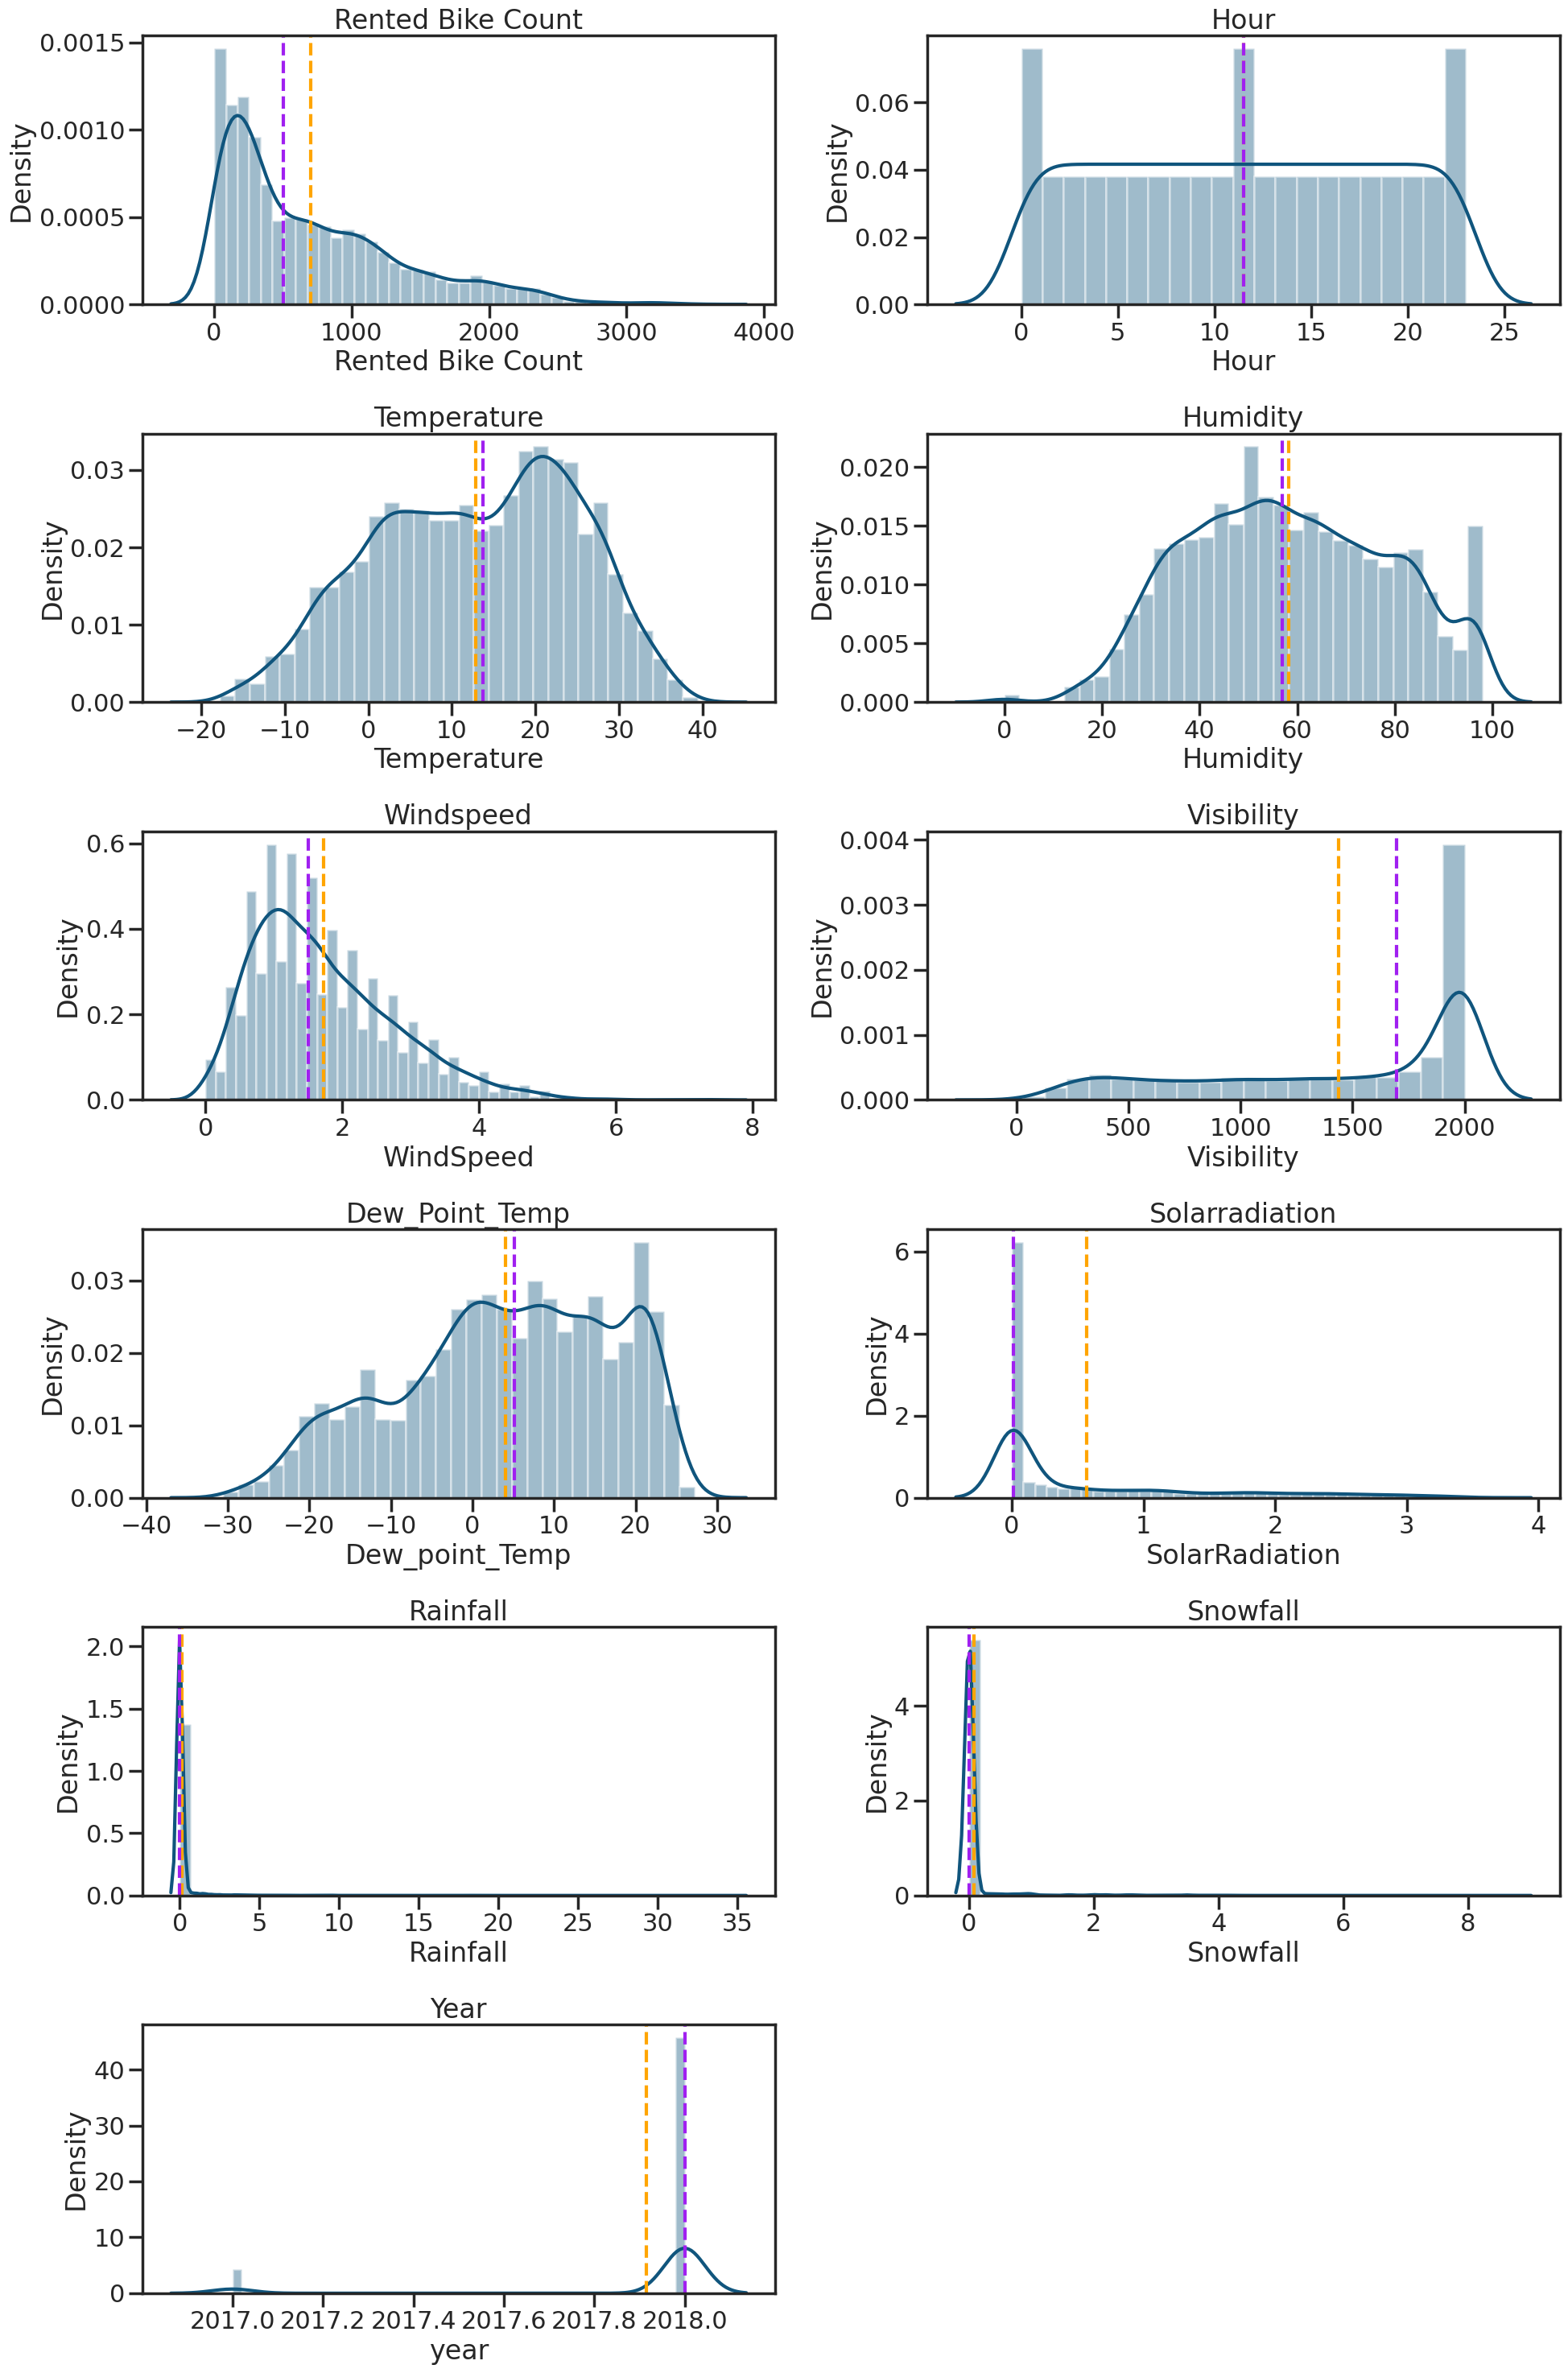

In [19]:
# Chart - 1 visualization code


#analysing numerical fetures using density plot with mean and median
#orange Color indicate mean of data
#Cyan indicate median of data

graph = plt.figure(figsize = (20,30))
for i,j in enumerate(numerical_df.columns) :
    sns.set_style("ticks")
    sns.set_context("poster");
    plt.subplot(6,2,i+1);
    sns.distplot(numerical_df[j], color = '#10557d');
    feature = numerical_df[j]
    plt.axvline(feature.mean(), color='orange', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.title(f'{j.title()}');
    plt.tight_layout();

##### 1. Why did you pick the specific chart?

In order to understand the distribution for each feature, I plotted distplot along with its mean and median. Distplot is shows both histogram and kde plot and is best suited for continous data.

##### 2. What is/are the insight(s) found from the chart?


**Right/Positive Skewed Distribution**: Mode < Median < Mean:
Rented_Bike_Count, Wind_speed, Solar Radiation

**No Skew**: Mean = Median = Mode : Hour, Temperature, Humidity,Rainfall,Snowfall

**Left/Negative Skewed Distribution:** Mean < Median < Mode: visibility

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In this context it can not define any business impact. It's done just to see the distribution of the column data over the dataset.

#### Chart - 2

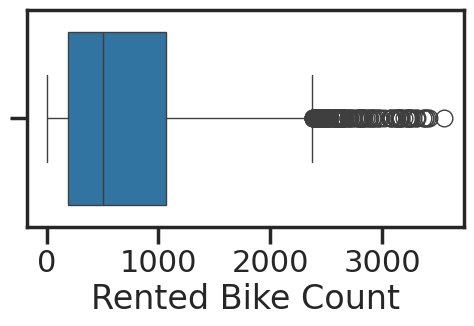

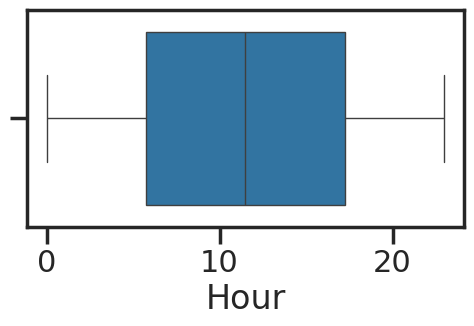

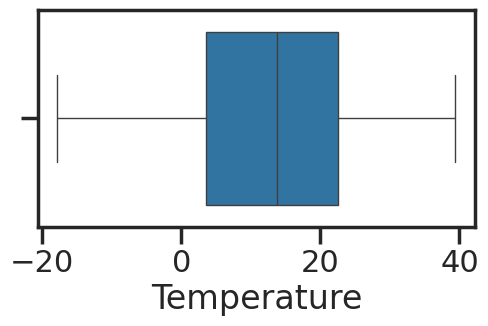

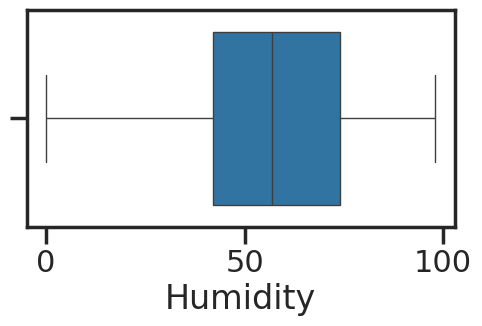

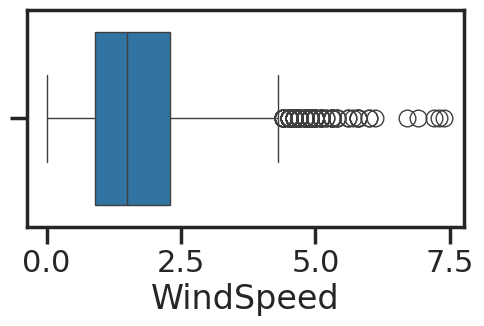

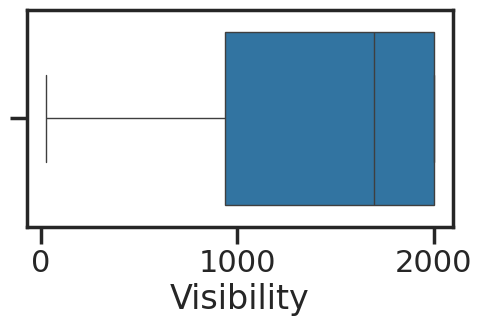

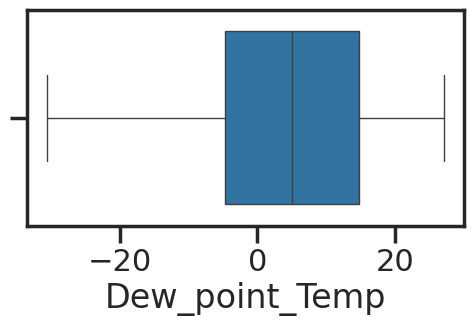

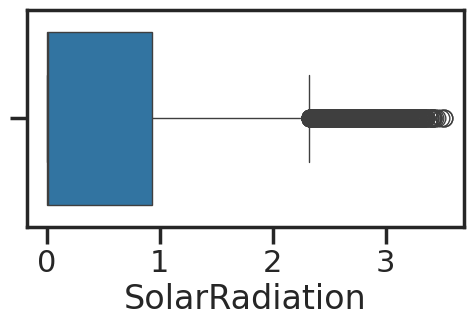

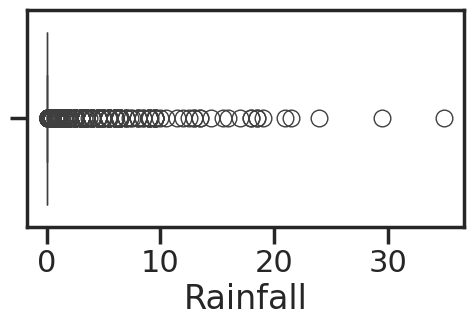

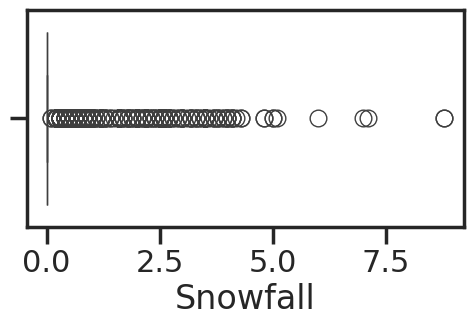

In [20]:
# Chart - 2 visualization code

for i,col in enumerate(numerical_df.columns) :
  if col!='year':
    plt.figure(figsize = (10,20))
    plt.subplot(6,2,i+1)
    sns.boxplot(x=numerical_df[col])
    plt.yticks(fontsize = 6)
    plt.tight_layout()


##### 1. Why did you pick the specific chart?

Box plot help in Visualization of outliers, distribution of median.

##### 2. What is/are the insight(s) found from the chart?

* In rented bike count feature there are few points accumulated above maximum range.
* Feature like snowfall and rainfall show sparse data as there are more number of values which is zero i.e., upto 75 quartile.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Box plot alone can not provide any business impact, plotted only to visulize distribution and understanding of anamolies.

###**BIVARIATE ANALYSIS**

#### Chart - 3

In [21]:
# Chart - 3 visualization code
e=df_bike.groupby(['Hour'])['Rented Bike Count'].sum().sort_values(ascending=False).reset_index()

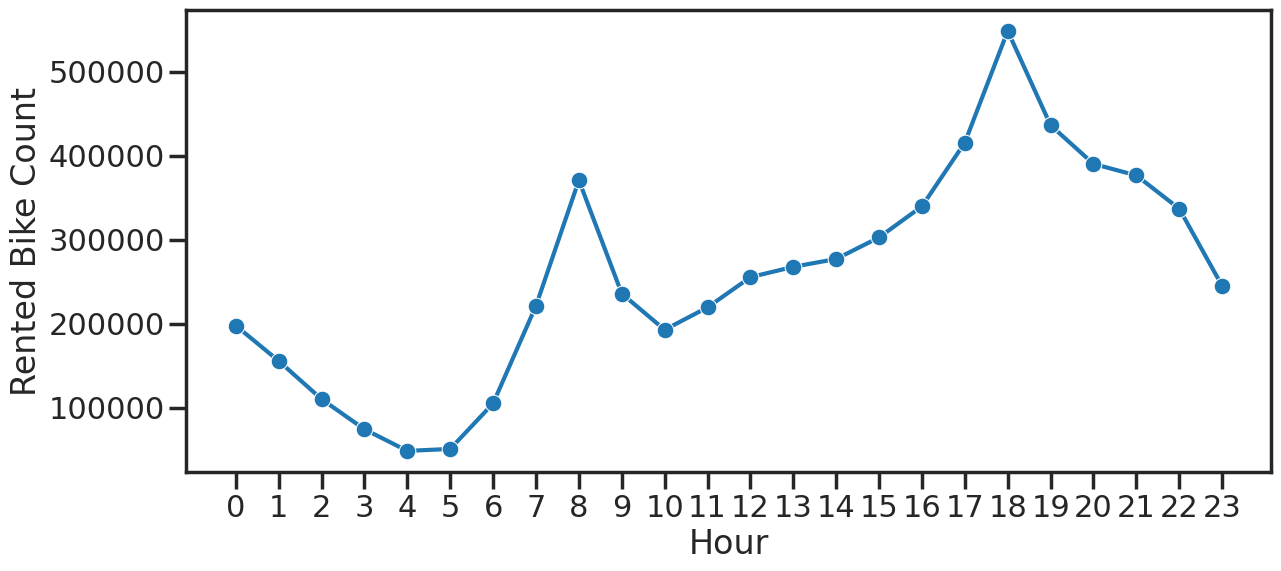

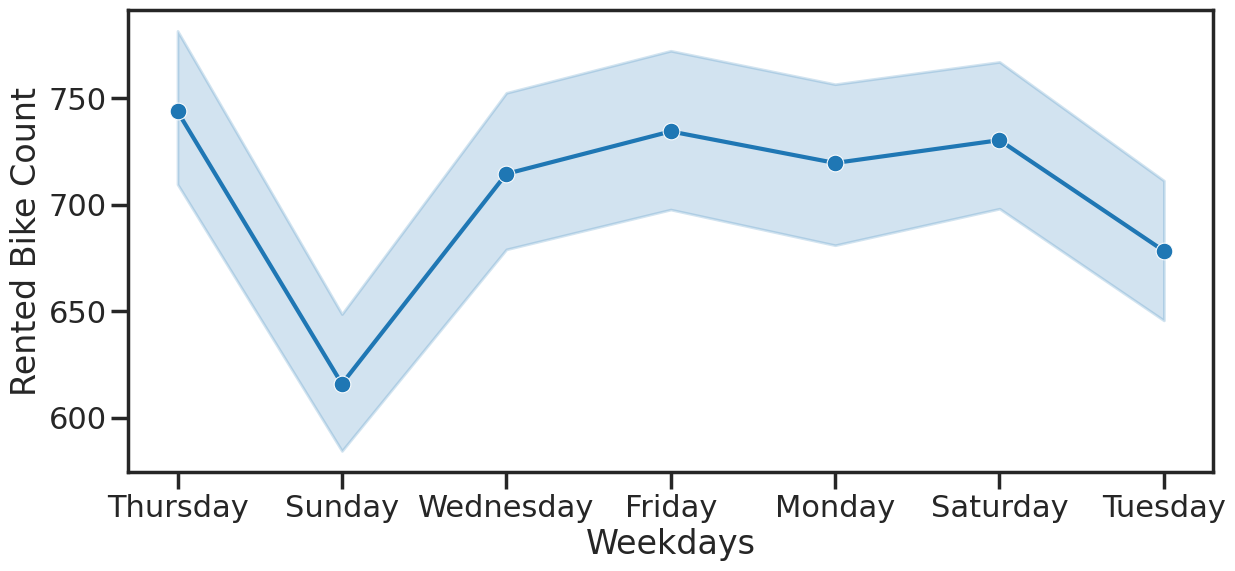

In [22]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=e,x='Hour',y='Rented Bike Count',marker='o')
plt.xlabel('Hour')
plt.xticks(range(24))
plt.show()

plt.figure(figsize=(14, 6))
sns.lineplot(data=df_bike,x='day',y='Rented Bike Count',marker='o')
plt.xlabel('Weekdays')
plt.show()

##### 1. Why did you pick the specific chart?

**Lineplot** for **Hour and Rented Bike Count :**

 I choose lineplot to plot hour and rented bike count for each hour because it helps in plotting for continous and vizualize the possible trend

 **Lineplot** for **day** and **Rented Bike Count :**

Lineplot helps in time series analysis to learn the trend.

##### 2. What is/are the insight(s) found from the chart?

**Lineplot for Hour and Rented Bike Count** :
* Demand for bike is more during 8-10 in morning and 18-20 in night.
* Bike demand from midnight start decreasing till 4 in morning then gradually increase and comes at peak in night.

**Lineplot for day and Rented Bike Count** :

* There is a increase in demand from mondat to thrusday then it lowers on friday, later increases on satuerday and shows least demand in sunday.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Lineplot for Hour and Rented Bike Count**:
* Hour of the day definetly plays important role for any business. It help in understanding the behaviour of customer engagement and how company should be prepared to deal with the situation. In this case since the demand is more is more in night and morning specifically to 8-9 and 18-20, stable supply to meet demand during those will increase revenue whereas shortage will cause negative growth.

**Lineplot for Hour and Rented Bike Count**:
* Yes, based on the activity it is necessary to maintain stable supply for most demanding day as it will directly affect revenue in case of shortage. Based on the demand if company will not fulfill criteria it will not only have negative brand effect but also low retention in customers.

#### Chart - 4

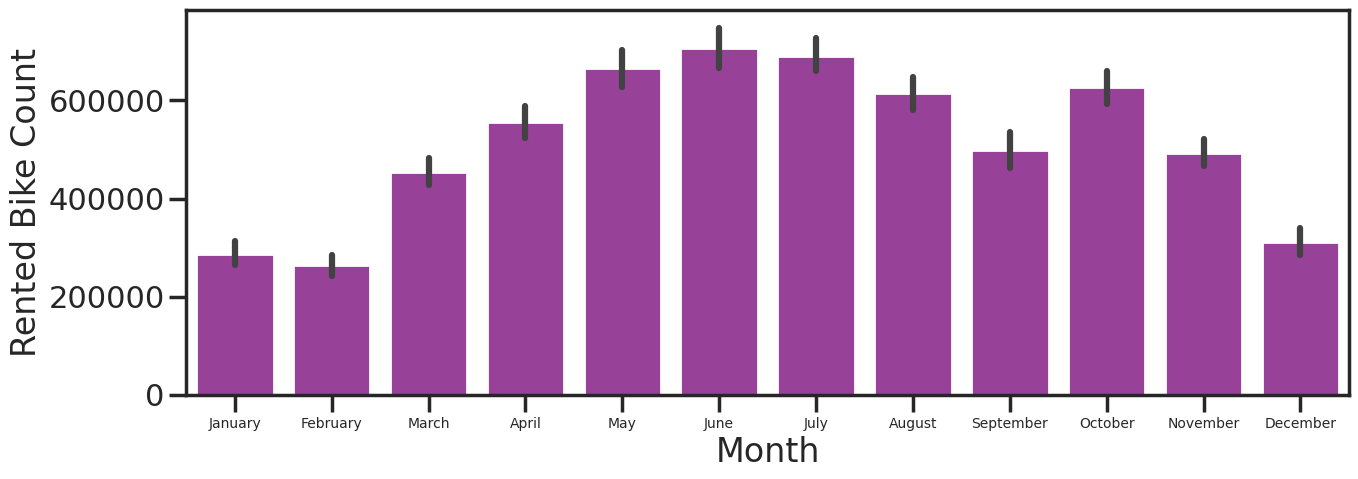

In [23]:
# Chart - 4 visualization code
plt.figure(figsize=(15,5))
sns.barplot(data=df_bike,x='month',y='Rented Bike Count',estimator='sum',color='#a632a8')
plt.xticks(fontsize=10)
plt.xlabel('Month')
plt.show()




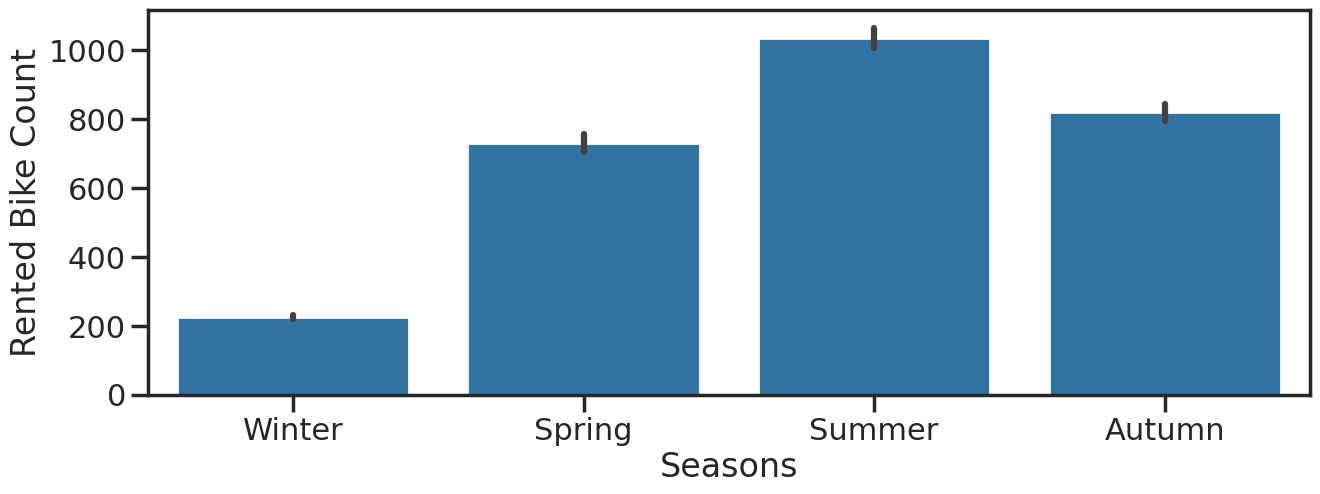

In [24]:
plt.figure(figsize=(15,5))
sns.barplot(data=df_bike,x='Seasons',y='Rented Bike Count',estimator='mean')
plt.xlabel('Seasons')
plt.show()

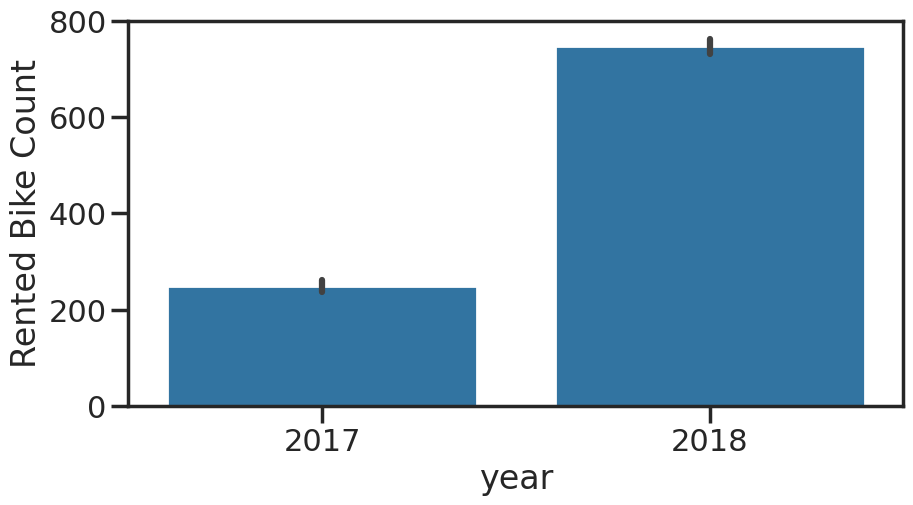

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_bike,x='year',y='Rented Bike Count')
plt.xlabel('year')
plt.show()

##### 1. Why did you pick the specific chart?


I used this chart because it helps to compare different categories.

##### 2. What is/are the insight(s) found from the chart?

**Month and rented bike count shows:**

Bike count increase from January till June then there is a small decrease and again rise in October and gradually decrease till December.

**Season and rented bike count shows:**

Demand for bike count is more in summer and lower in winters and with season graph it is also justified.

**Year and rented bike count:**

There is a increase in demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

Yes, based on the above insight it will help in customer retention and growth.

Since data available is only for two year, therefore year itself can not have any much of impact on business, however it shows increase which is a sign of market capture for a new business.

#### Chart - 5

In [26]:
#dividing the hour feature into morning , afternoon and night time
def time_day(feature1):
  la=[]
  if  feature1>5 and feature1 <12:
    return 'Morning'
  elif feature1>=12 and feature1<18:
    return 'Afternoon'
  else:
    return 'Night'


df_bike['Time_period']=df_bike['Hour'].apply(time_day)


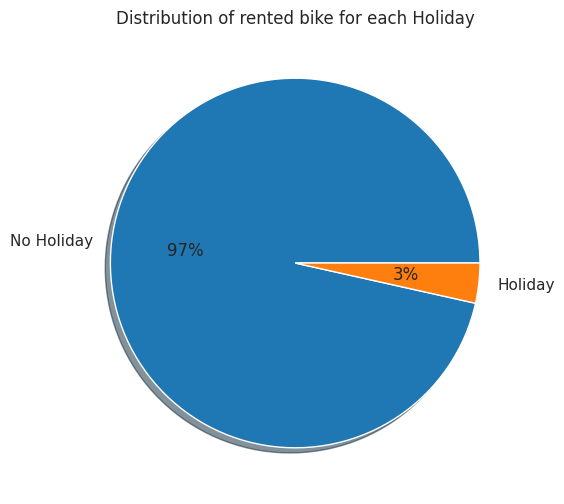

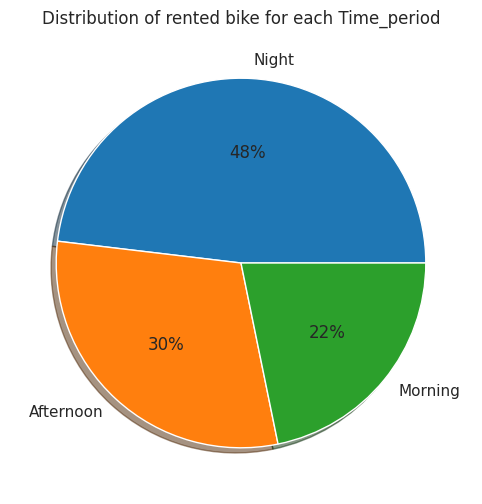

In [27]:
# Chart - 5 visualization code
for i in ['Holiday','Time_period']:
    grp = df_bike.groupby([i], as_index = False)['Rented Bike Count'].sum().sort_values('Rented Bike Count',
                                                                                    ascending = False)
    sns.set_context('notebook');
    plt.figure(figsize=(12,6));
    palette_color = sns.color_palette('bright');
    plt.pie(grp['Rented Bike Count'], labels= grp[i],shadow= True,autopct='%.0f%%');
    plt.title(f"Distribution of rented bike for each {i}");


##### 1. Why did you pick the specific chart?

Both time period and holiday represnt categorial data with binary answers i.e., yes or no and that's why used the pie chart to understand different allocation of each answer.

##### 2. What is/are the insight(s) found from the chart?

* **97%** of bikes are rented when there is **no holiday** and **3%** on **holiday**.
* **48%** of bikes are rented when it is **night** followed afternoon and morning

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Similarly, holiday always results in reduced foot traffic which can also be seen in the graph how only 3% of the demand is generated on holiday, in order to maintain the profit ratio on holiday slight increase in price could balance profit ratio. Since we do not know exact price point from dataset, it will hard to say what amount to increase and how price affect the demand, will increase in price can lead to negative growth.

#### Chart - 6

In [28]:
df_bike.columns

Index(['Rented Bike Count', 'Hour', 'Temperature', 'Humidity', 'WindSpeed',
       'Visibility', 'Dew_point_Temp', 'SolarRadiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning Day', 'month', 'day',
       'year', 'Time_period'],
      dtype='object')

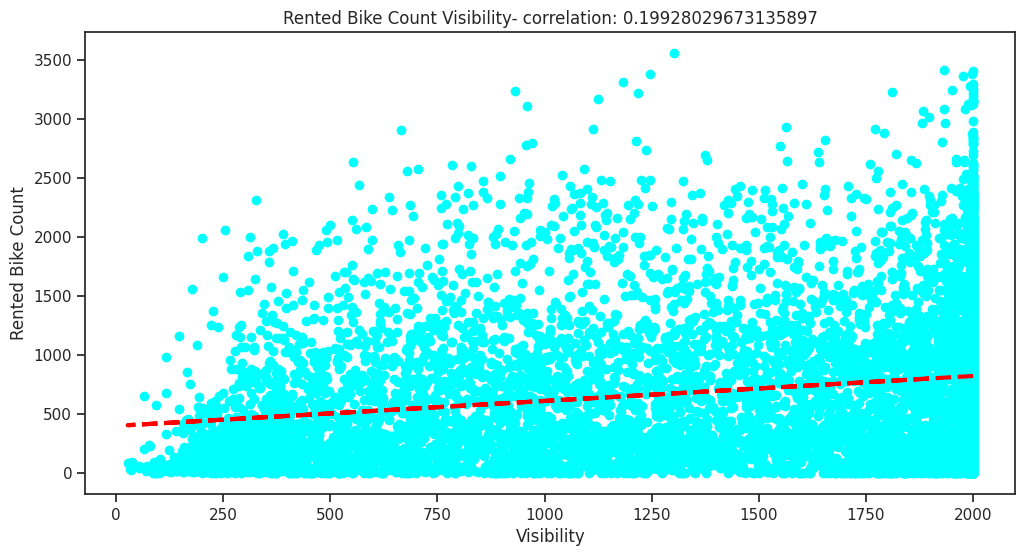

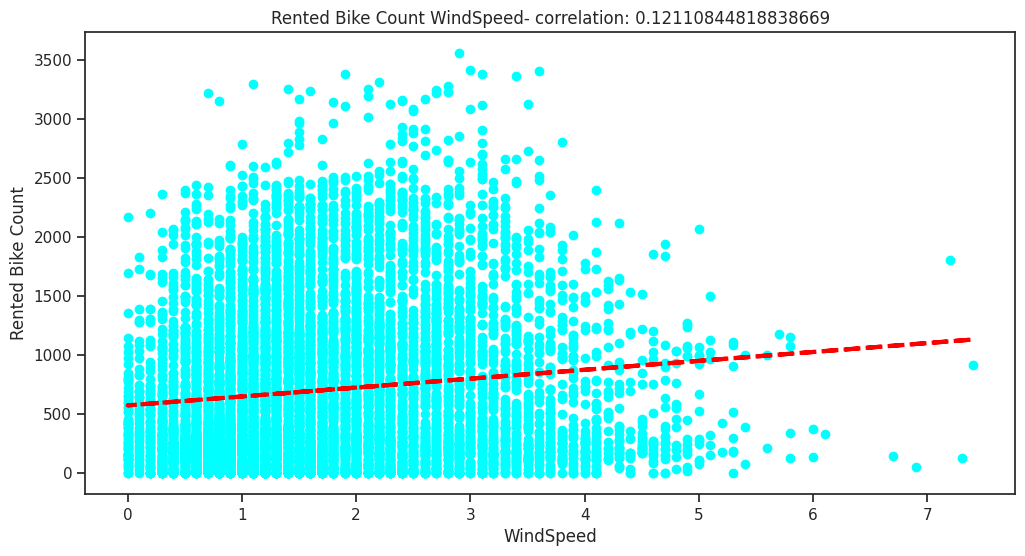

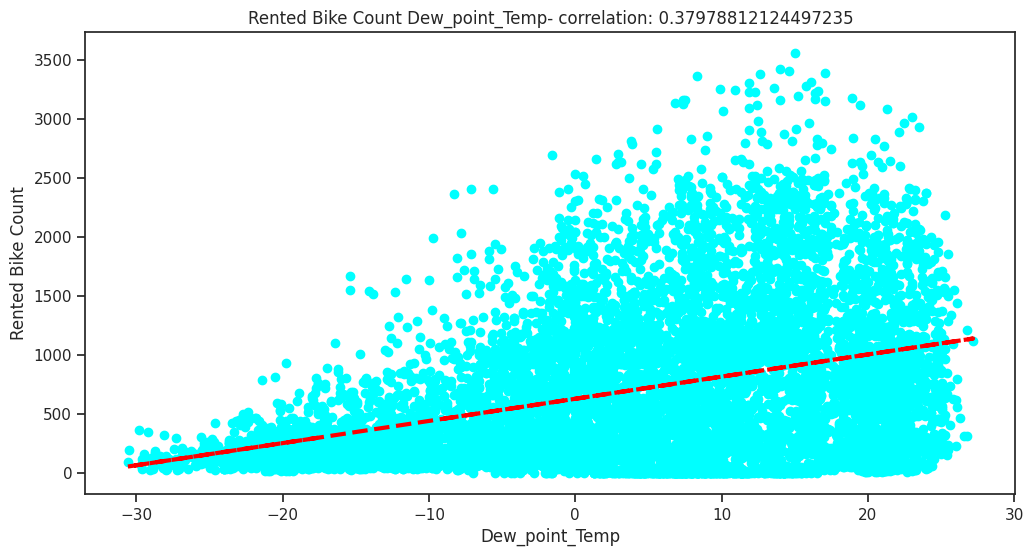

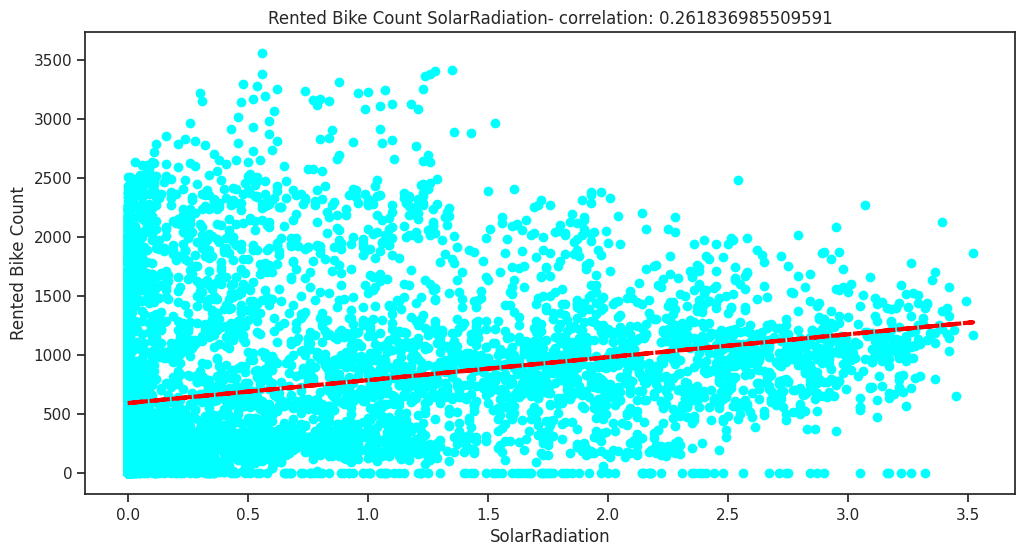

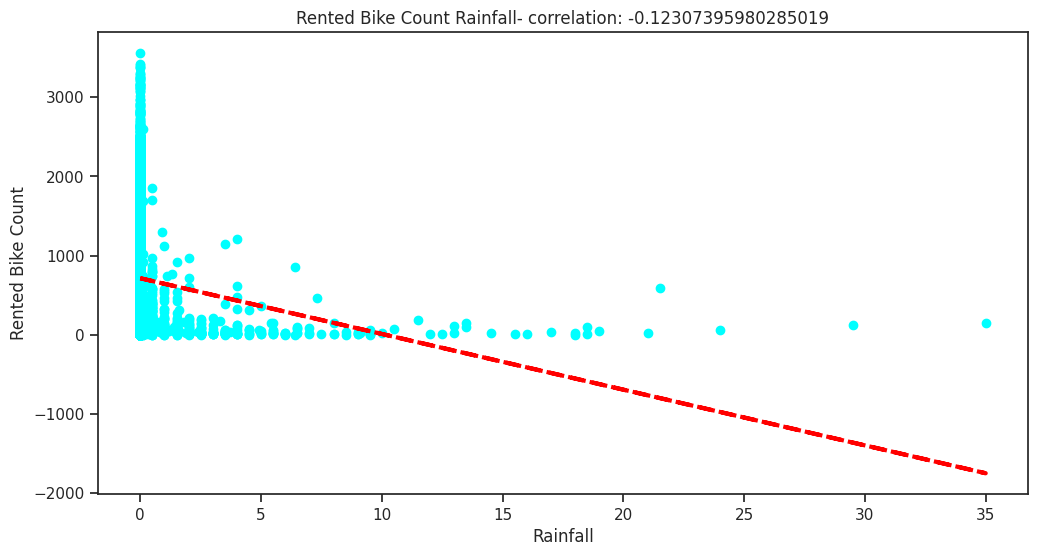

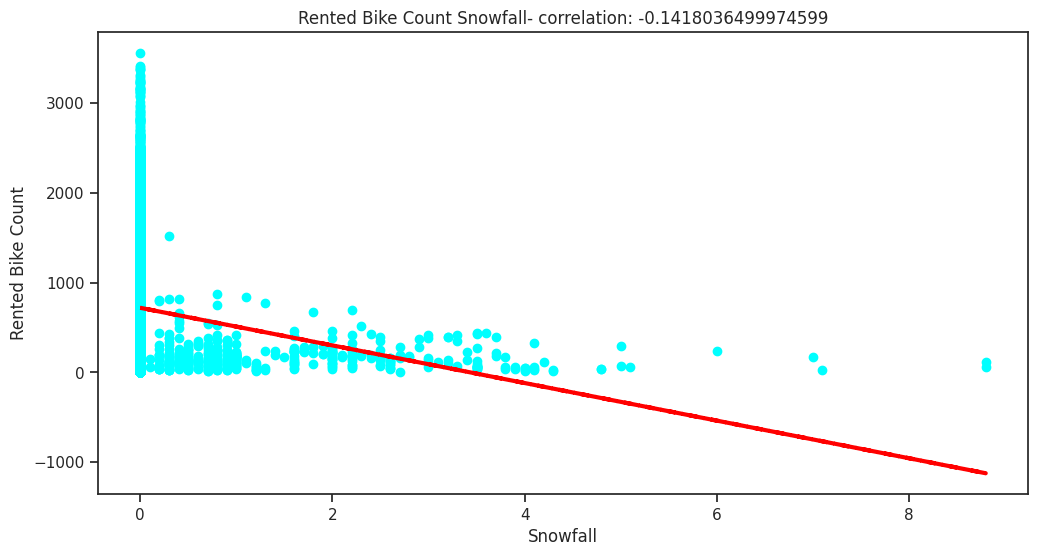

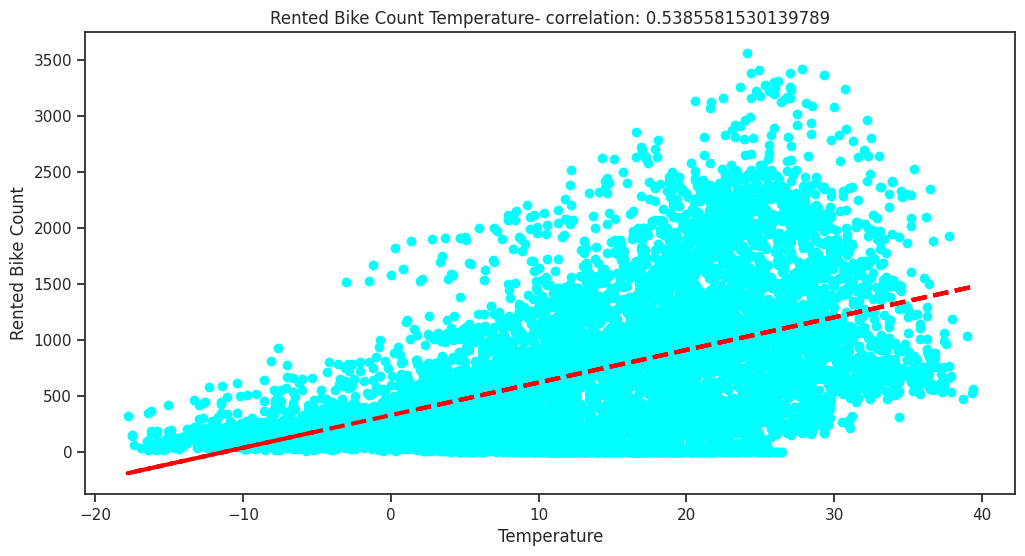

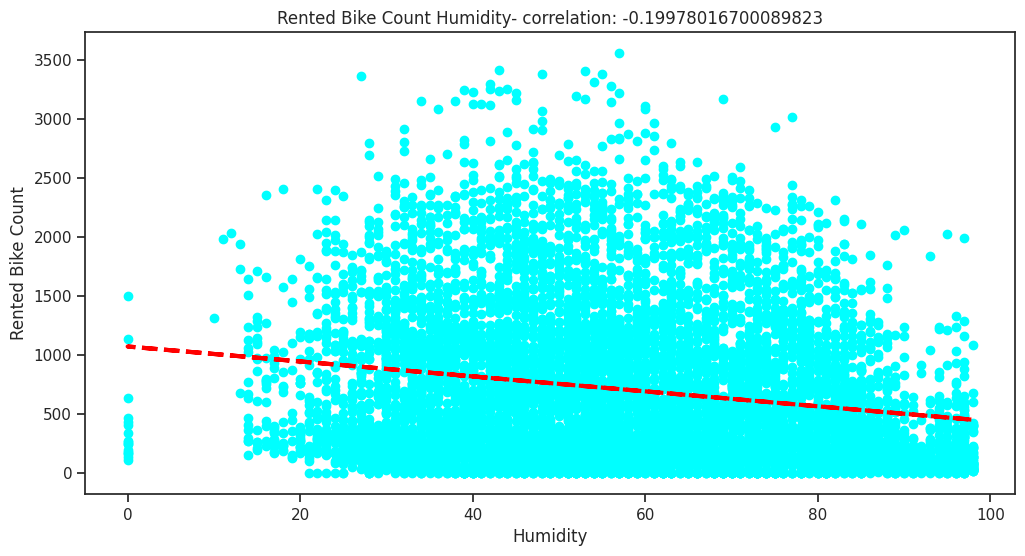

In [29]:
# Chart - 6 visualization code
for i in ['Visibility','WindSpeed','Dew_point_Temp','SolarRadiation','Rainfall','Snowfall','Temperature','Humidity']:
    sns.set_context('notebook');
    fig = plt.figure(figsize=(12, 6));
    ax = fig.gca();
    feature = df_bike[i]
    label = df_bike['Rented Bike Count']
    correlation = feature.corr(label)
    chart = plt.scatter(x=feature, y=label,color='cyan');
    plt.xlabel(i);
    plt.ylabel('Rented Bike Count');
    ax.set_title('Rented Bike Count ' + i + '- correlation: ' + str(correlation));
    z = np.polyfit(df_bike[i], df_bike['Rented Bike Count'], 1);
    y_hat = np.poly1d(z)(df_bike[i]);

    plt.plot(df_bike[i], y_hat, "r--", lw=3);



##### 1. Why did you pick the specific chart?

Scatterplot is best when we need to vizualize relationship between two variable.

##### 2. What is/are the insight(s) found from the chart?

* Snowfall and rainfall show negative linear relation with rented bike count.
* Bike demand is more when there is low solar radiaiton.
* When there is high visibility, demand is more.
* Dew point and humidity shows increase in demand when they are present in moderate amount.
* Less windspeed is prefered for maximum demand.
* Average temperature of 20-35 show maximum demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

Environmental factors play an important role as the business solely depends upon them for its operations and success.However we can not control these natural environment, therefore based on the demand and how it alter it, company should be alet with wether forecasting to arrange suitable demand based on daily weather.

These natural environment factors can significantly impact the demand for bike rentals by making it less appealing or unsafe to ride a bike.

###**MULVARIATE ANALYSIS**

#### Chart - 7

In [30]:
categorical_feature=list(df_bike.select_dtypes(include='object').columns)


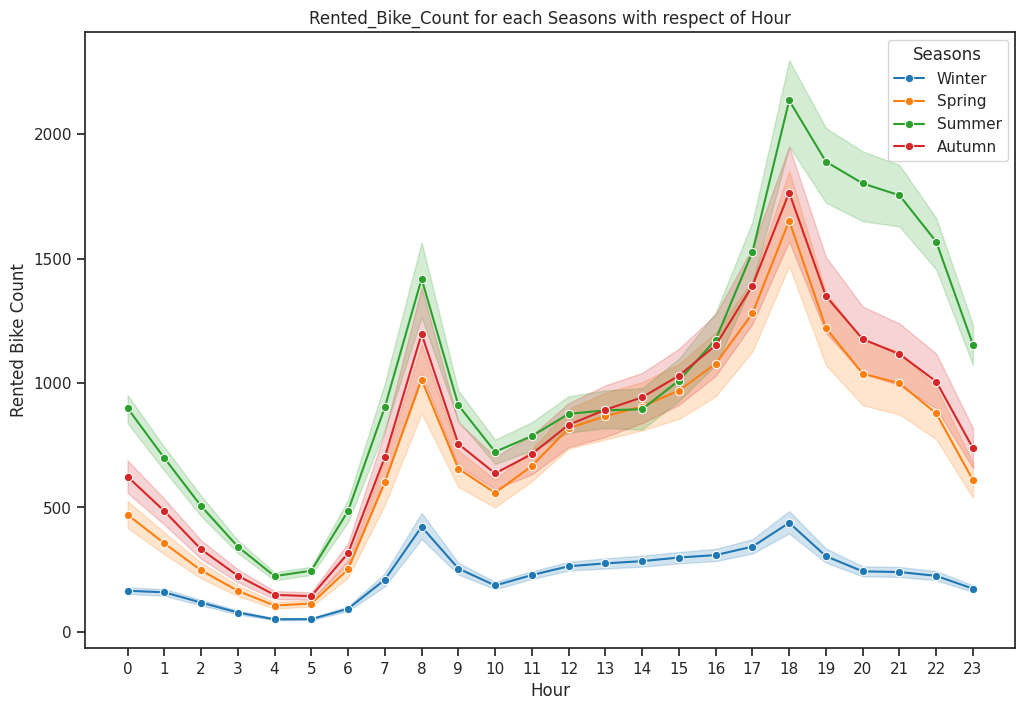

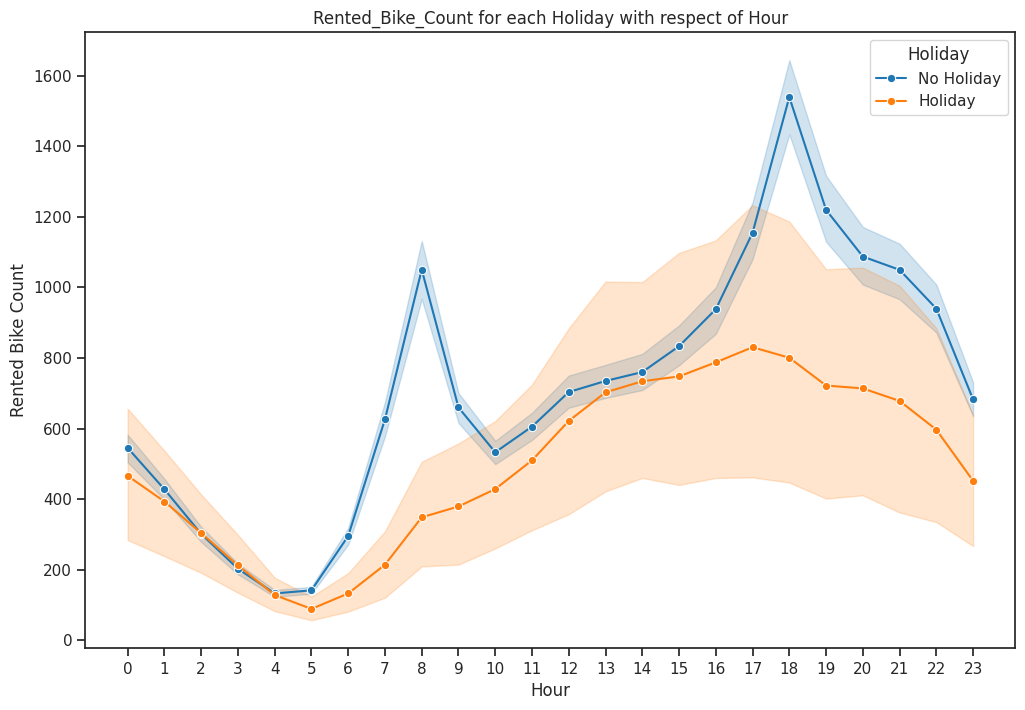

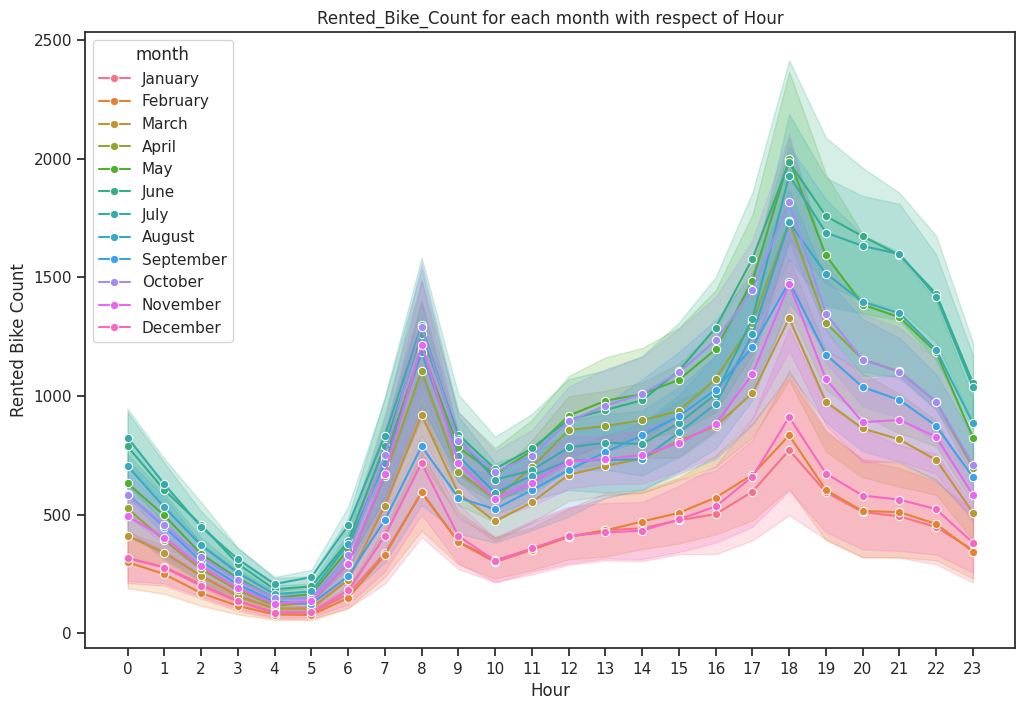

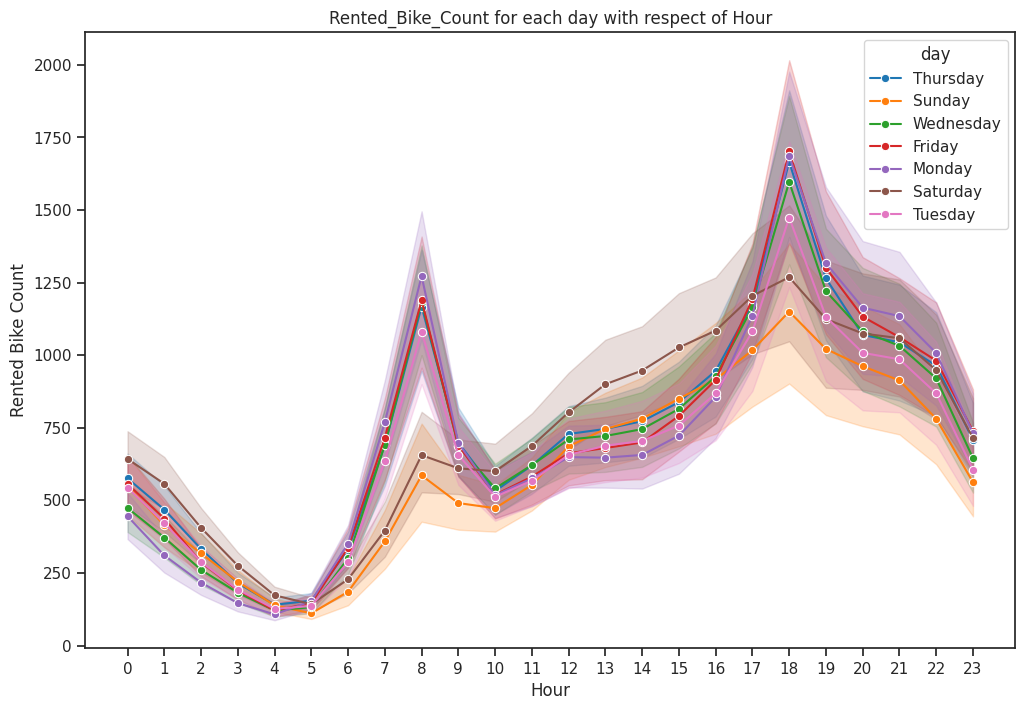

In [31]:
# Chart - 7 visualization code
for i in categorical_feature:
  if i in ['Hour','Time_period','Functioning Day']:
    pass
  else:
    plt.figure(figsize=(12,8))
    fig = sns.lineplot(x=df_bike["Hour"],y=df_bike['Rented Bike Count'],hue=df_bike[i], marker ='o');
    plt.xticks(range(24));
    plt.title(f"Rented_Bike_Count for each {i} with respect of Hour");
  plt.show();

##### 1. Why did you pick the specific chart?

I picked the lineplot for comparing different feature based on hue because I was comparing different features based on time.

##### 2. What is/are the insight(s) found from the chart?

Shows **maximum** demand around 8-9 and 18-20 irrespect of other features

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


It is important to maintain demand based on the time to generate stable profit.

Based on time period if unable to maintain demand, it will create a chance of new competition.

#### Chart - 8 -  Correlation Heatmap

In [32]:
df_bike.iloc[:,0:10].corr()

Rented Bike Count  Hour  Temperature  Humidity  WindSpeed  \
Rented Bike Count               1.00  0.41         0.54     -0.20       0.12   
Hour                            0.41  1.00         0.12     -0.24       0.29   
Temperature                     0.54  0.12         1.00      0.16      -0.04   
Humidity                       -0.20 -0.24         0.16      1.00      -0.34   
WindSpeed                       0.12  0.29        -0.04     -0.34       1.00   
Visibility                      0.20  0.10         0.03     -0.54       0.17   
Dew_point_Temp                  0.38  0.00         0.91      0.54      -0.18   
SolarRadiation                  0.26  0.15         0.35     -0.46       0.33   
Rainfall                       -0.12  0.01         0.05      0.24      -0.02   
Snowfall                       -0.14 -0.02        -0.22      0.11      -0.00   

                   Visibility  Dew_point_Temp  SolarRadiation  Rainfall  \
Rented Bike Count        0.20            0.38            0.26     -0.12   
Hour                     0.10            0.00            0.15      0.01   
Temperature              0.03            0.91            0.35      0.05   
Humidity                -0.54            0.54           -0.46      0.24   
WindSpeed                0.17           -0.18            0.33     -0.02   
Visibility               1.00           -0.18            0.15     -0.17   
Dew_point_Temp          -0.18            1.00            0.09      0.13   
SolarRadiation           0.15            0.09            1.00     -0.07   
Rainfall                -0.17            0.13           -0.07      1.00   
Snowfall                -0.12           -0.15           -0.07      0.01   

                   Snowfall  
Rented Bike Count     -0.14  
Hour                  -0.02  
Temperature           -0.22  
Humidity               0.11  
WindSpeed             -0.00  
Visibility            -0.12  
Dew_point_Temp        -0.15  
SolarRadiation        -0.07  
Rainfall               0.01  
Snowfall               1.00

<Axes: >

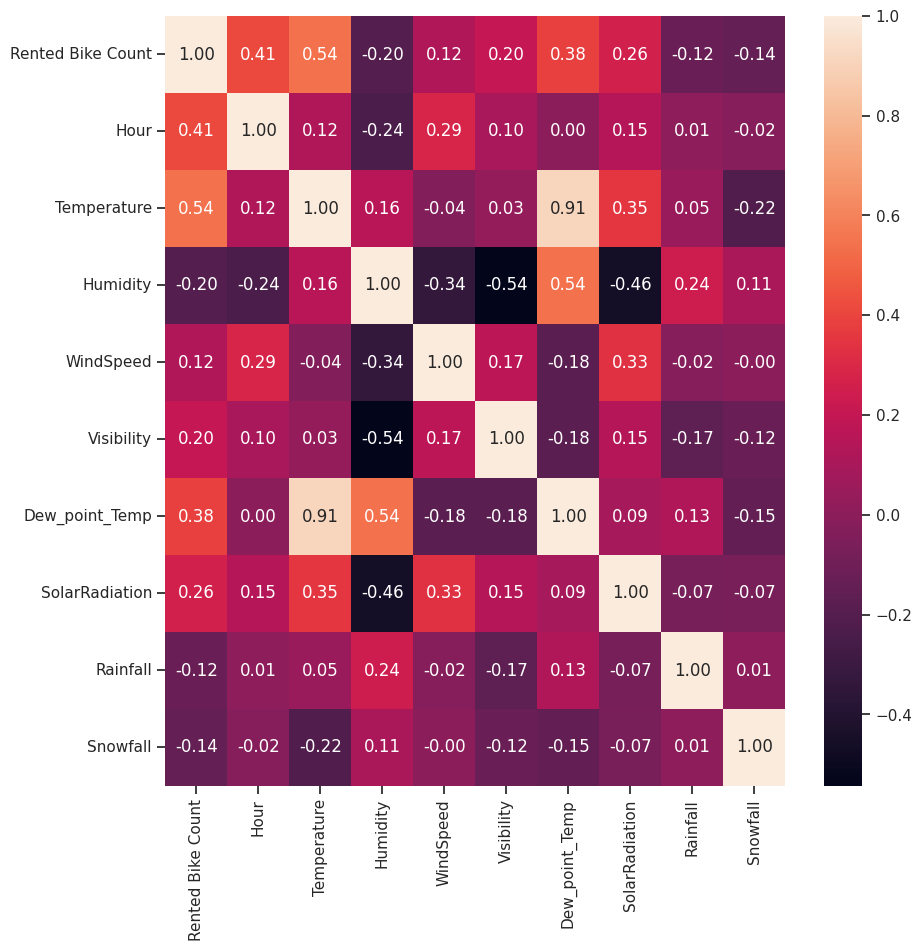

In [33]:
# Chart - 8 visualization code
plt.figure(figsize=(10,10))
sns.heatmap(df_bike.iloc[:,0:10].corr(),annot=True,fmt='.02f')

##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

* Features like Temperature(°C) and Dew point temperature(°C) show correlation of 0.91 and in general, an absolute correlation coefficient of > 0.7 among two or more predictors indicates the presence of multicollinearity.
* Hour and temperature show positive correlation

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The correlation matrix provided offers insights into the relationships between various weather conditions, the time of day, and the number of rented bikes. Understanding these relationships can indeed help create a positive business impact and identify potential challenges that might lead to negative growth.

**Positive Business Impact Insights**

* Temperature and Bike Rentals (0.54):

There is a strong positive correlation between temperature and the number of rented bikes. Warmer temperatures likely encourage more people to rent bikes.
Actionable Insight: Marketing campaigns and promotions could be targeted more aggressively during warmer months or days to capitalize on this trend.

* Hour of the Day and Bike Rentals (0.41):

A moderate positive correlation with the time of day suggests that bike rentals peak during certain hours. This might correspond to commuting hours or recreational times.
Actionable Insight: Optimize bike availability and station staffing during peak hours to ensure sufficient supply and better customer service.

* Solar Radiation (0.26):

A positive correlation with solar radiation implies that sunnier days also see more bike rentals.
Actionable Insight: Promote bike rentals on sunny days through weather-triggered promotions or discounts.

**Potential Negative Growth Insights**

* Humidity (-0.20):

>A negative correlation with humidity suggests that higher humidity levels might deter people from renting bikes.
Potential Issue: On particularly humid days, there might be a noticeable drop in rentals.
Mitigation: Consider offering incentives or discounts on high humidity days to maintain rental numbers.

* Visibility (-0.20):

>Lower visibility is associated with fewer bike rentals, likely due to safety concerns.
Potential Issue: Poor visibility days (e.g., fog, heavy rain) could reduce rentals.
Mitigation: Ensure safety measures are highlighted and possibly offer additional protective gear or enhanced safety guidelines during such conditions.

Answer Here

#### Chart - 9 - Pair Plot

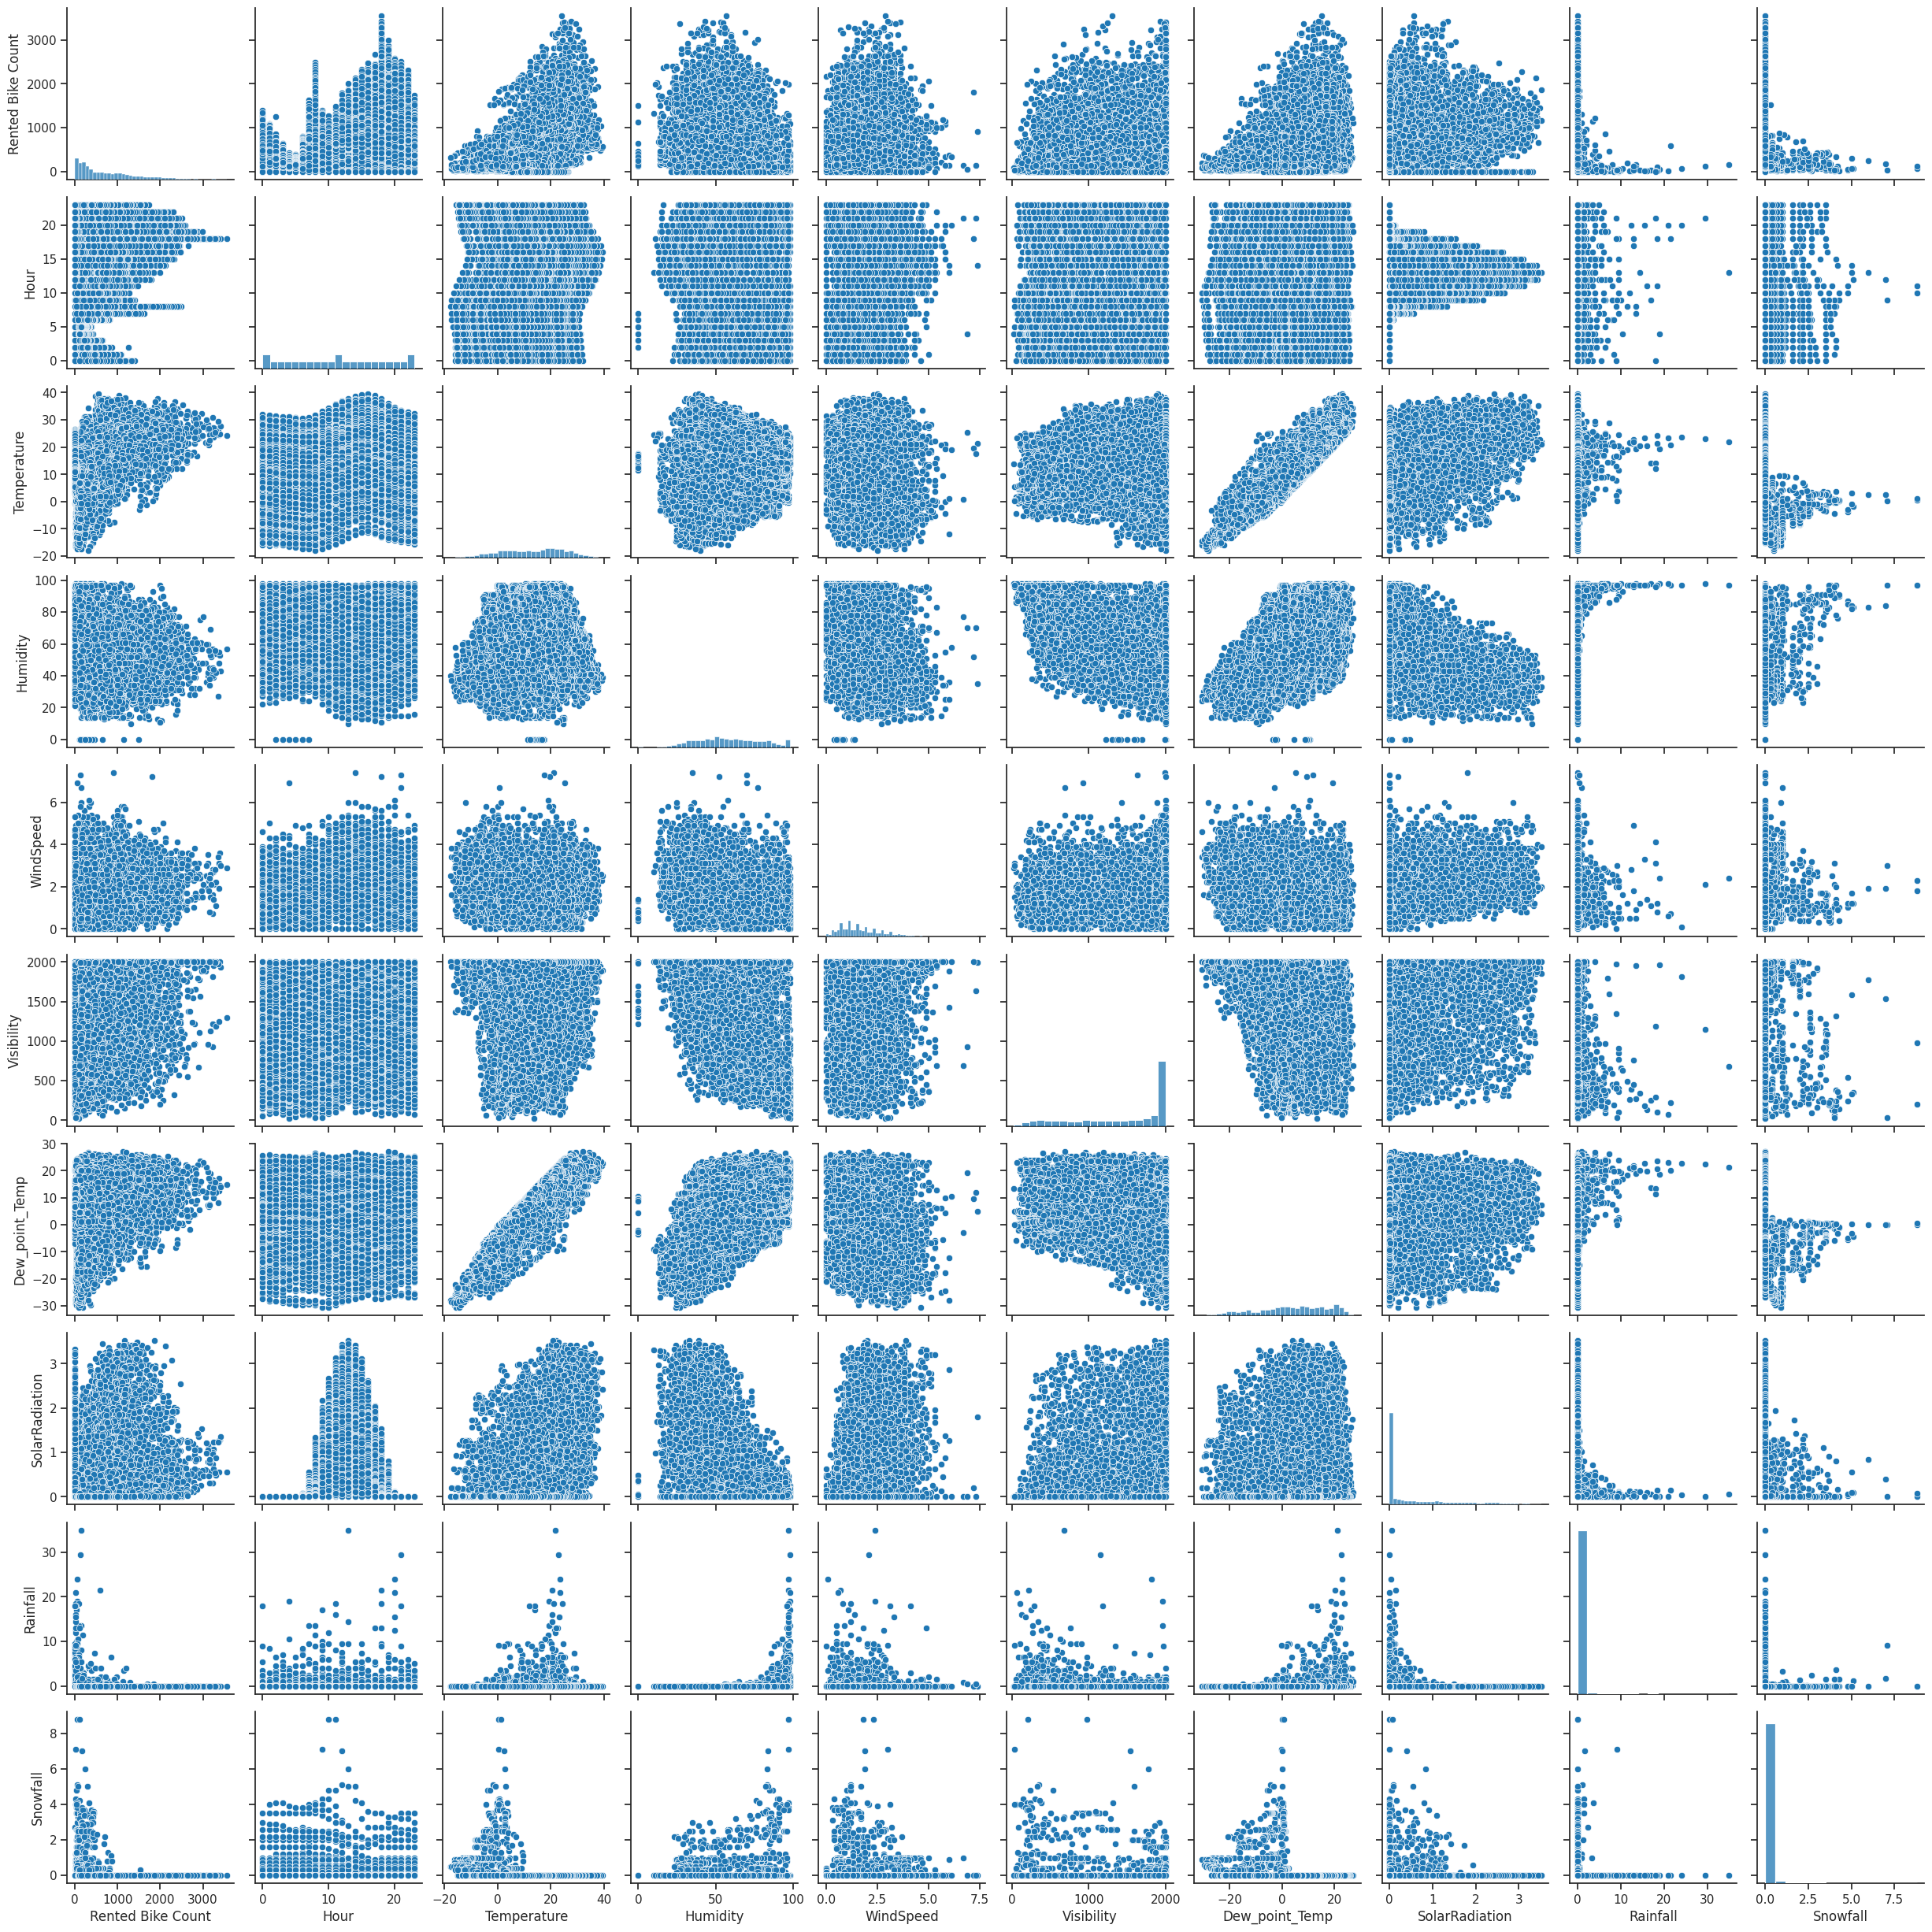

In [34]:
# Pair Plot visualization code
sns.pairplot(df_bike.iloc[:,0:13])
plt.show()

##### 1. Why did you pick the specific chart?

It helps in unfolding patterns and relationsships between different features

##### 2. What is/are the insight(s) found from the chart?

* Rented Bike Count:

>The histogram shows a skewed distribution, indicating that most days have a moderate number of rentals, with fewer days having very high rental counts.

* Hour:

>The distribution of 'Hour' is nearly uniform, as it represents a 24-hour cycle.

* Temperature and Dew Point Temperature:

>Both temperature and dew point temperature have relatively normal distributions with some skewness, showing a concentration around the mean values.

* Humidity:

>Humidity appears to have a more uniform distribution with a slight concentration at higher values.

* Visibility:

>The visibility data shows a wide range, with some clustering around the higher visibility values.

* Solar Radiation, Rainfall, and Snowfall:

>Solar radiation has a distribution concentrated around lower values but extends to higher values.
Rainfall and snowfall are mostly concentrated at the lower end, indicating that most days have little to no precipitation.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1.   There is no difference in the mean number of rented bikes between different hours of the day.

2.   There is no relationship between temperature and the number of rented bikes.

3.   There is no difference in the mean number of rented bikes between different seasons.








### Hypothetical Statement - 1

####1. State Your research hypothesis as a null hypothesis and alternate hypothesis

 **Null hypothesis**: There is no difference in the mean number of rented bikes between different hours of the day.

 **Alternative hypothesis**: There is a difference in the mean number of rented bikes between different hours of the day.

 **Test type** : ANOVA test.

#### 2. Perform an appropriate statistical test.

In [35]:
# Perform Statistical Test to obtain P-Value
# Define the null and alternative hypotheses
null_hypothesis_H0 = "There is no difference in the mean number of rented bikes \
                      between different hours of the day."
alternative_hypothesis_Ha = "There is a difference in the mean number of rented \
                      bikes between different hours of the day."
# Group the data by hour
data_by_hour = df_bike.groupby('Hour')

# Calculate the mean number of rented bikes for each hour
means = data_by_hour['Rented Bike Count'].mean()

# Perform an ANOVA test to compare the means
F, p = stats.f_oneway(*[data_by_hour['Rented Bike Count'].get_group(hour)
                        for hour in data_by_hour.groups])
# * operator before the list of groups passed to the f_oneway() function,
# which specifies that the list should be treated as separate arguments rather than as a single argument

# Print the result of the test
print(f"F-statistic: {F:.3f}")
print(f"p-value: {p:.3f}")
if p < 0.05: #0.05 is significance threshold value to test
   print(f"{alternative_hypothesis_Ha} (reject H0(Null Hypothesis))")
else:
   print(f"{null_hypothesis_H0} (fail to reject H0(Null Hypothesis))")


F-statistic: 156.687
p-value: 0.000
There is a difference in the mean number of rented                       bikes between different hours of the day. (reject H0(Null Hypothesis))


##### Which statistical test have you done to obtain P-Value?

I chose to use an analysis of variance (ANOVA) test for the hypotheses because ANOVA is a statistical test that is used to determine whether there is a statistically significant difference in the means of two or more groups.

##### Why did you choose the specific statistical test?

ANOVA works by comparing the variance within each group to the variance between the groups. If the variance within the groups is small relative to the variance between the groups, it suggests that the means of the groups are significantly different. On the other hand, if the variance within the groups is large relative to the variance between the groups, it suggests that the means of the groups are not significantly different.

This test is suitable for these hypotheses because they both involve comparing the mean values of a variable (the number of rented bikes) with different group (hours of the day).

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null hypothesis**: There is no relationship between temperature and the number of rented bikes.

**Alternative hypothesis**: There is a relationship between temperature and the number of rented bikes.

**Test Type**: Pearson correlation coefficient

#### 2. Perform an appropriate statistical test.

In [36]:
# Perform Statistical Test to obtain P-Value
# Define the null and alternative hypotheses
null_hypothesis = "There is no relationship between temperature and the number of rented bikes."
alternative_hypothesis = "There is a relationship between temperature and the number of rented bikes."

# Calculate the correlation between temperature and the number of rented bikes
r, p = stats.pearsonr(df_bike['Temperature'], df_bike['Rented Bike Count'])

# Print the result of the test
print(f"Correlation coefficient: {r:.3f}")
print(f"p-value: {p:.3f}")
if p < 0.05:
   print(f"{alternative_hypothesis} (reject H0)")
else:
   print(f"{null_hypothesis} (fail to reject H0)")

Correlation coefficient: 0.539
p-value: 0.000
There is a relationship between temperature and the number of rented bikes. (reject H0)


##### Which statistical test have you done to obtain P-Value?

I used the Pearson correlation coefficient and the p-value to test the statistical significance of the relationship between the number of rented bikes and the temperature. Specifically, I used the pearsonr() function from the scipy.stats library to calculate the Pearson correlation coefficient and the p-value between the Temperature and Rented_Bike_Count columns of the data.



##### Why did you choose the specific statistical test?


The Pearson correlation coefficient is a measure of the strength and direction of the linear relationship between two variables, and it takes on values between -1 and 1. A value of -1 indicates a strong negative linear relationship, a value of 0 indicates no linear relationship, and a value of 1 indicates a strong positive linear relationship.

I chose to use the Pearson correlation coefficient and p-value for this null hypothesis because they are suitable for testing the statistical significance of a linear relationship between two continuous variables. In this case, the Temperature column is a continuous variable that can take on any value within a certain range, and the Rented_Bike_Count column is also a continuous variable that can take on any integer value within a certain range.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null hypothesis**: There is no difference in the mean number of rented bikes between different seasons.

**Alternative hypothesis**: There is a difference in the mean number of rented bikes between different seasons.

**Test Type**: ANOVA Test

#### 2. Perform an appropriate statistical test.

In [37]:
# Perform Statistical Test to obtain P-Value
# Define the null and alternative hypotheses
null_hypothesis = "There is no difference in the mean number of rented bikes between different seasons."
alternative_hypothesis = "There is a difference in the mean number of rented bikes between different seasons."

# Group the data by season
data_by_season = df_bike.groupby('Seasons')

# Calculate the mean number of rented bikes for each season
means = data_by_season['Rented Bike Count'].mean()

# Perform an ANOVA test to compare the means
F, p = stats.f_oneway(*[data_by_season['Rented Bike Count'].get_group(season)
                         for season in data_by_season.groups])
# Print the result of the test
print(f"F-statistic: {F:.3f}")
print(f"p-value: {p:.3f}")
if p < 0.05:
   print(f"{alternative_hypothesis} (reject H0)")
else:
   print(f"{null_hypothesis} (fail to reject H0)")

F-statistic: 776.468
p-value: 0.000
There is a difference in the mean number of rented bikes between different seasons. (reject H0)


##### Which statistical test have you done to obtain P-Value?

I chose to use an analysis of variance (ANOVA) test for the hypotheses because ANOVA is a statistical test that is used to determine whether there is a statistically significant difference in the means of two or more groups.

##### Why did you choose the specific statistical test?

ANOVA works by comparing the variance within each group to the variance between the groups. If the variance within the groups is small relative to the variance between the groups, it suggests that the means of the groups are significantly different. On the other hand, if the variance within the groups is large relative to the variance between the groups, it suggests that the means of the groups are not significantly different.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

Rented Bike Count    0
Hour                 0
Temperature          0
Humidity             0
WindSpeed            0
Visibility           0
Dew_point_Temp       0
SolarRadiation       0
Rainfall             0
Snowfall             0
Seasons              0
Holiday              0
Functioning Day      0
month                0
day                  0
year                 0
Time_period          0
dtype: int64


<Axes: >

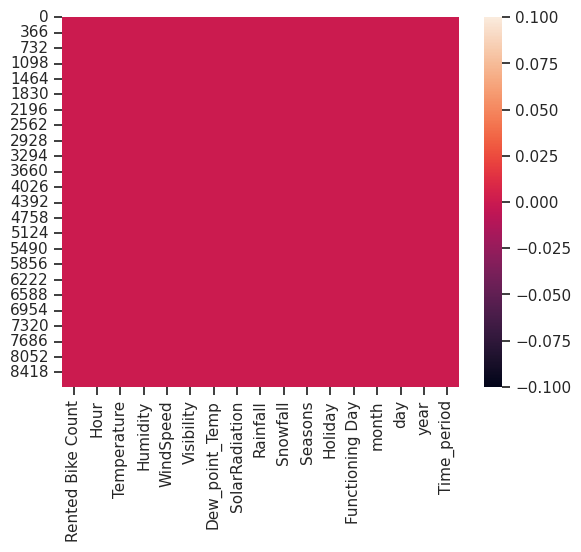

In [38]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(df_bike.isnull().sum())

# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df_bike.isnull())

#### What all missing value imputation techniques have you used and why did you use those techniques?

Since, there were no missing values to handle in the given dataset no further manipulation was needed.

### 2. Handling Outliers

In [39]:
# Handling Outliers & Outlier treatments
#since it has two observation for now converting into categorial later will change using onehot encoding
df_bike['year'] = df_bike.year.astype('str')
symmetric_feature=[]
non_symmetric_feature=[]
for i in df_bike.describe().columns:
  if abs(df_bike[i].mean()-df_bike[i].median())<0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

#ignoring rainfall and snowfall due to sparsity(upto 75 percentile value was 0
# and this outliers are needed for model to learn)
#ignoring dependent variable as Outliers in the dependent variable may be
#indicative of unusual or unexpected patterns in the data that could be of interest and should not be removed

#note: model perform well on capping outliers in both features after trial

# symmetric_feature = symmetric_feature[:-2]
# non_symmetric_feature.pop(0)
# print("Symmetric Distributed Features : -",symmetric_feature)
# print("Skew Symmetric Distributed Features : -",non_symmetric_feature)


Symmetric Distributed Features : - ['Hour', 'Rainfall', 'Snowfall']
Skew Symmetric Distributed Features : - ['Rented Bike Count', 'Temperature', 'Humidity', 'WindSpeed', 'Visibility', 'Dew_point_Temp', 'SolarRadiation']


In [40]:
# For Symmetric features defining upper and lower boundry(normally distributed using std and mean)
def outlier_treatment(df,feature):
  upper_boundary= df[feature].mean()+3*df[feature].std()
  lower_boundary= df[feature].mean()-3*df[feature].std()
  return upper_boundary,lower_boundary

In [41]:
# Restricting/ capping the data to lower and upper boundry

for feature in symmetric_feature:
  #below lower value then value = lower value
  df_bike.loc[df_bike[feature]<= outlier_treatment(df=df_bike,feature=feature)[1], feature]=outlier_treatment(df=df_bike,feature=feature)[1]
  #above higher value, then value = higher value
  df_bike.loc[df_bike[feature]>= outlier_treatment(df=df_bike,feature=feature)[0], feature]=outlier_treatment(df=df_bike,feature=feature)[0]


In [42]:
# For Skew Symmetric features defining upper and lower boundry
#Outer Fence
def outlier_treatment_skew(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)-1.5*IQR
  upper_bridge =df[feature].quantile(0.75)+1.5*IQR
  # print(f'feature: {feature} IQR:{IQR} lower: {lower_bridge} upper:{upper_bridge}')
  return upper_bridge,lower_bridge

In [43]:
# Restricting the data to lower and upper boundry
for feature in non_symmetric_feature:
  df_bike.loc[df_bike[feature]<= outlier_treatment_skew(df=df_bike,feature=feature)[1], feature]=outlier_treatment_skew(df=df_bike,feature=feature)[1]
  df_bike.loc[df_bike[feature]>= outlier_treatment_skew(df=df_bike,feature=feature)[0], feature]=outlier_treatment_skew(df=df_bike,feature=feature)[0]


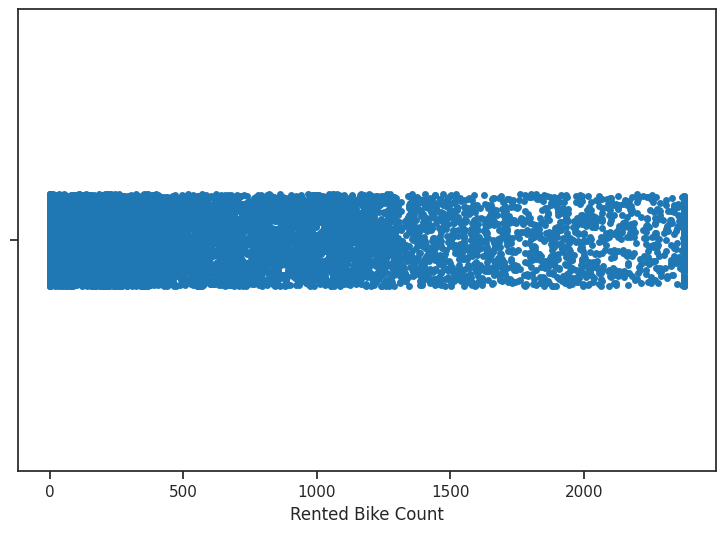

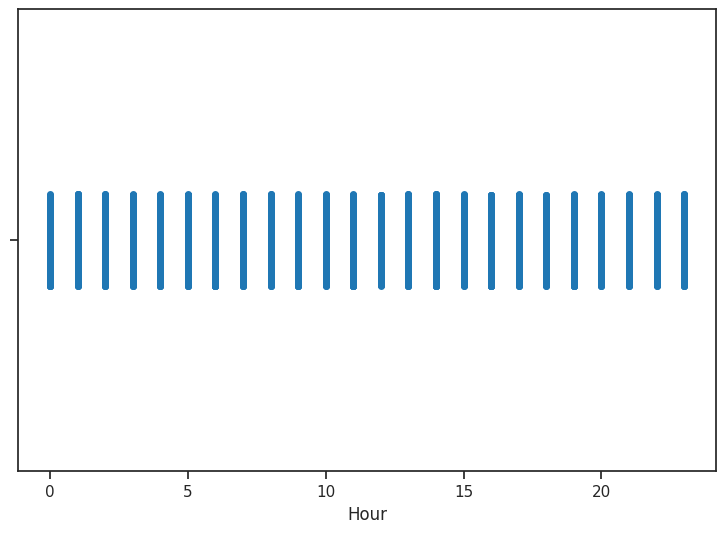

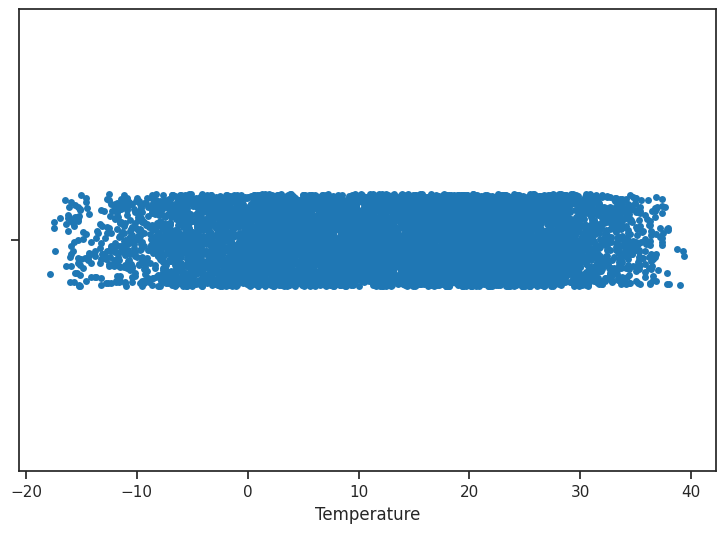

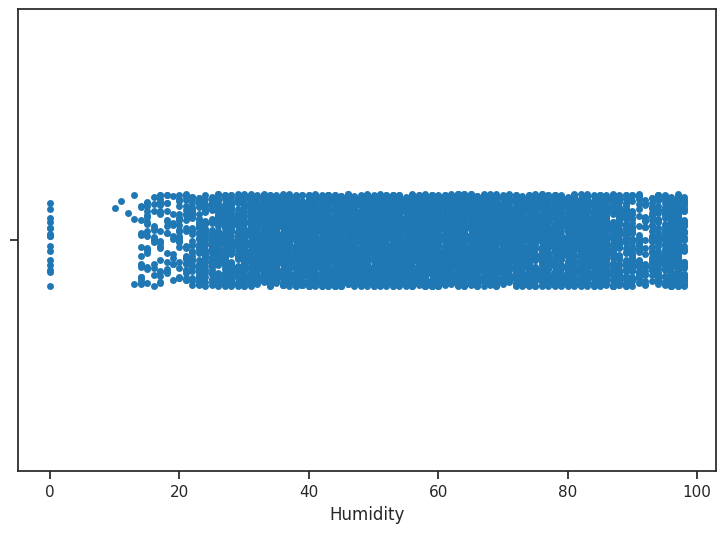

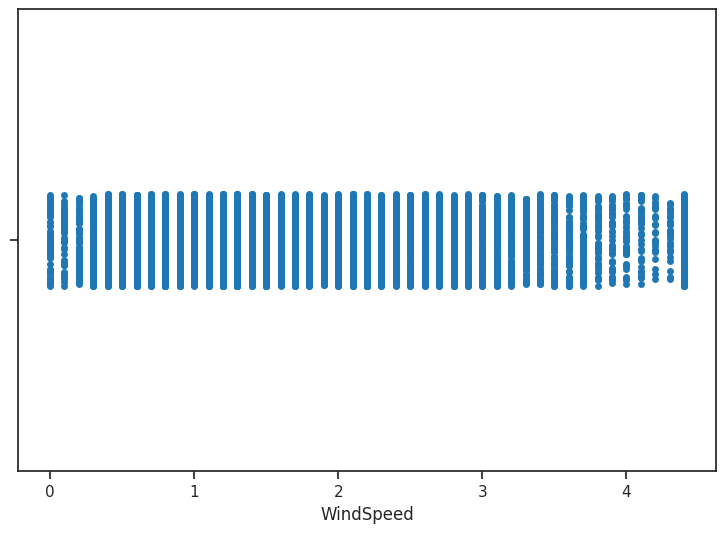

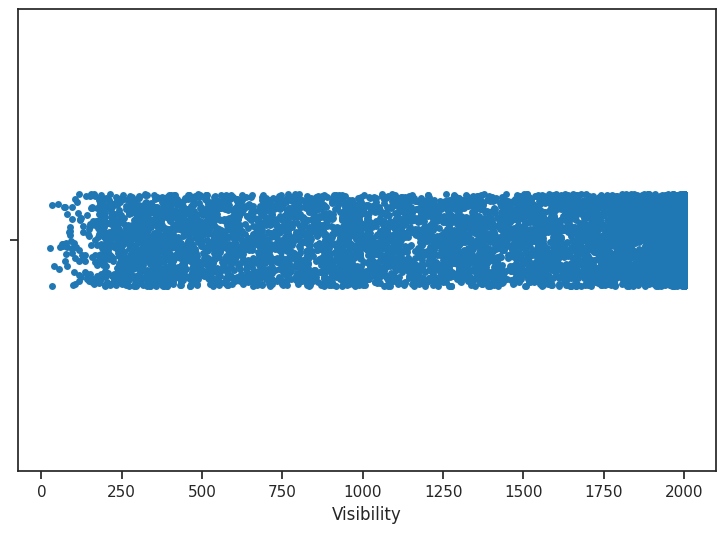

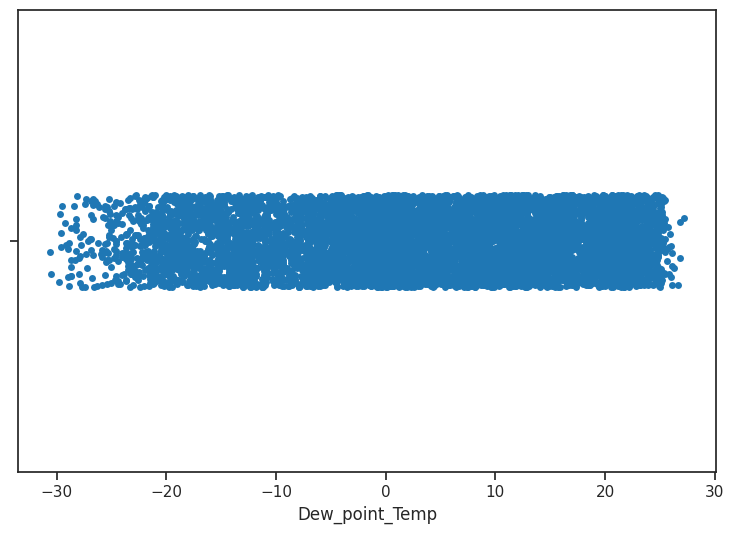

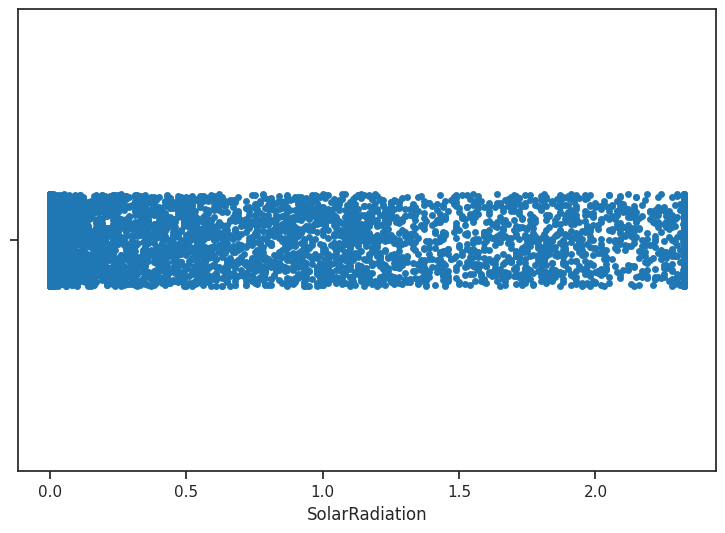

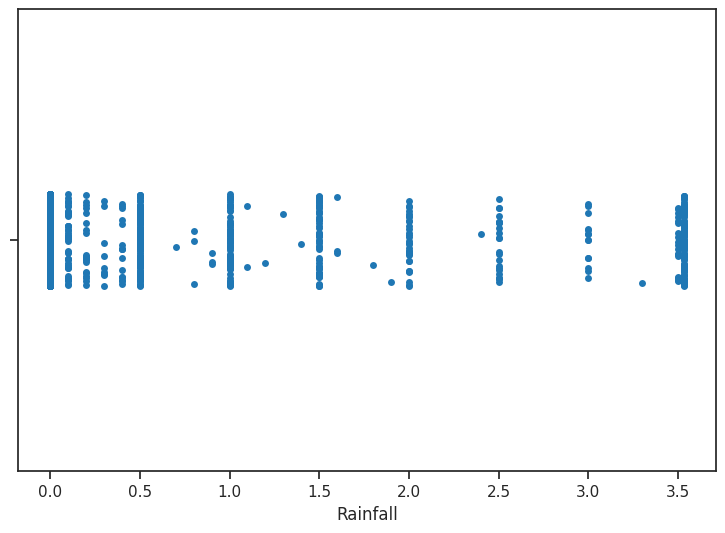

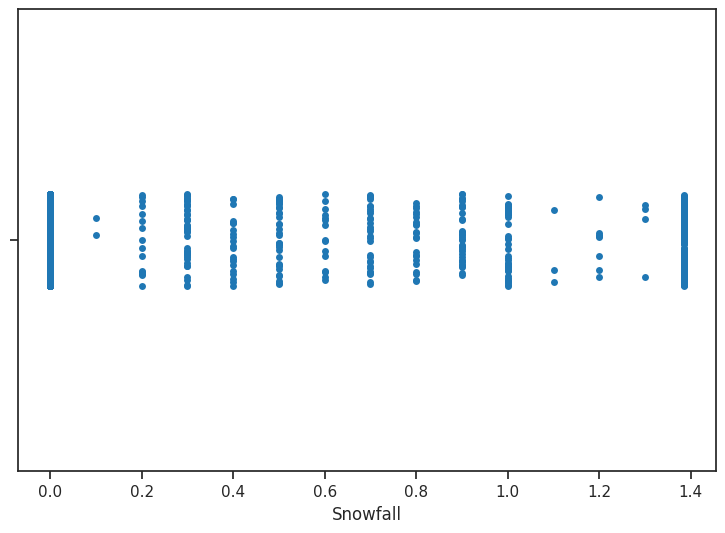

In [44]:
# After Outlier Treatment showing the dataset distribution using strip plot
# Visualising  code for the numerical columns
for col in df_bike.describe().columns:
  fig=plt.figure(figsize=(9,6))
  sns.stripplot(x=df_bike[col])


##### What all outlier treatment techniques have you used and why did you use those techniques?

First I changed the Year column to sring as it shouldn't be treated as numerical column as there are only two type of values and should be treated as categorical column. Then I separated the skew symmetric and symmetric features and define the upper and lower boundry as defined below. Then, I used capping method to change outliers into upper and lower limit instead of trimming where i could have just removed the entire data.

Another way to do it is dropping extreme values.

In a Gaussian distribution while it’s the symmetric curve and outlier are present. Then, we can set the boundary by taking standard deviation into action.

Identifying which columns in a dataset have a symmetric distribution can be useful because it can give you insight into the overall shape of the distribution of values in each column. For example, if a column has a symmetric distribution, it may be more likely to have a bell-shaped curve when plotted on a histogram. This can be useful to know because certain statistical techniques and machine learning algorithms assume that the data is normally distributed, and having a symmetric distribution is one indication that the data may be approximately normally distributed. On the other hand, if a column has a non-symmetric distribution, it may be more likely to be skewed in one direction or the other, which could affect the validity of certain statistical tests or the performance of certain machine learning models.

The box plot is a useful graphical display for describing the behavior of the data in the middle as well as at the ends of the distributions. The box plot uses the median and the lower and upper quartiles (defined as the 25th and 75th percentiles). If the lower quartile is Q1 and the upper quartile is Q3, then the difference (Q3 — Q1) is called the interquartile range or IQ. A box plot is constructed by drawing a box between the upper and lower quartiles with a solid line drawn across the box to locate the median. The following quantities (called fences) are needed for identifying extreme values in the tails of the distribution:

lower inner fence: Q1 – 1.5*IQ

upper inner fence: Q3 + 1.5*IQ

lower outer fence: Q1 – 3*IQ

upper outer fence: Q3 + 3*IQ

### 3. Categorical Encoding

In [45]:
# Encode your categorical columns
cat_category = df_bike.select_dtypes(include = 'object')
print(f'Categorial Features: {list(cat_category.columns)}')


Categorial Features: ['Seasons', 'Holiday', 'Functioning Day', 'month', 'day', 'year', 'Time_period']


In [46]:
dfcopy = df_bike.copy()

In [47]:
dd = df_bike.copy()

>  Deleting some extra features like 'Day','Time_period','Year' and 'Month' because day has been converted into working and weekends, timeperiod as keeping hour since it show good correlation, month because it is already shorten to seasons and year because it does not have much variation and there is less to learn from that.

In [48]:
#deleting extra feature
dfcopy.drop(columns = ['day','Time_period','year','month'], axis =1, inplace = True)


In [49]:
#applying encoding to categorial features

#dfcopy = dfcopy.apply(LabelEncoder().fit_transform)
dfcopy = pd.get_dummies(dfcopy, drop_first = True,dtype='int64')
dfcopy.head(1)

Rented Bike Count  Hour  Temperature  Humidity  WindSpeed  Visibility  \
0             254.00  0.00        -5.20        37       2.20        2000   

   Dew_point_Temp  SolarRadiation  Rainfall  Snowfall  Seasons_Spring  \
0          -17.60            0.00      0.00      0.00               0   

   Seasons_Summer  Seasons_Winter  Holiday_No Holiday  Functioning Day_Yes  
0               0               1                   1                    1

#### What all categorical encoding techniques have you used & why did you use those techniques?

Since there were not much of different unique categories in each categorial feature, I used one hot encoding using labelencoder function which simply converts each feature into 0 and 1.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

Absolute humidity is the mass of water vapor in a given volume of air, while relative humidity is the percentage of water vapor in the air compared to the maximum amount of water vapor that the air can hold at a particular temperature.

Hence using the two column temperature and dewpoint calculating absolute humidity, as a new feature as both of them were showing high correlation.

In [50]:
#creating function to use dew point and temperature to calculate absolute humidity
import math

def absolute_humidity(df, temperature_column, dew_point_column):
  # constants
  a = 17.27
  b = 237.7

  # create a new column for absolute humidity
  df['Absolute_Humidity'] = None

  # iterate over the rows of the DataFrame
  for index, row in df.iterrows():
    temperature = row[temperature_column]
    dew_point = row[dew_point_column]

    # check for dew point equal to or higher than temperature
    if dew_point >= temperature:
      # set absolute humidity to zero to prevent division by zero
      df.at[index, 'Absolute_Humidity'] = 0.0
    else:
      # calculate saturation vapor pressure
      svp = (a * dew_point) / (b + dew_point)

      # check for temperature equal to zero
      if temperature == 0:
        # set absolute humidity to zero to prevent division by zero
        df.at[index, 'Absolute_Humidity'] = 0.0
      else:
        # calculate absolute humidity
        ah = 6.112 * svp * math.exp((a * temperature) / (b + temperature)) / temperature

        # store the absolute humidity in the new column
        df.at[index, 'Absolute_Humidity'] = ah

  return df

In [51]:
#calling function
dfcopy = absolute_humidity(dfcopy, 'Temperature', 'Dew_point_Temp')
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rented Bike Count    8760 non-null   float64
 1   Hour                 8760 non-null   float64
 2   Temperature          8760 non-null   float64
 3   Humidity             8760 non-null   int64  
 4   WindSpeed            8760 non-null   float64
 5   Visibility           8760 non-null   int64  
 6   Dew_point_Temp       8760 non-null   float64
 7   SolarRadiation       8760 non-null   float64
 8   Rainfall             8760 non-null   float64
 9   Snowfall             8760 non-null   float64
 10  Seasons_Spring       8760 non-null   int64  
 11  Seasons_Summer       8760 non-null   int64  
 12  Seasons_Winter       8760 non-null   int64  
 13  Holiday_No Holiday   8760 non-null   int64  
 14  Functioning Day_Yes  8760 non-null   int64  
 15  Absolute_Humidity    8760 non-null   o

In [52]:
dfcopy['Absolute_Humidity'] = dfcopy.Absolute_Humidity.astype('int')

> When dummies are used for creating new feature they get data type of uint8 which means it is an unsigned integer which is a non-negative integer that can hold only positive values and zero. The range of values that an uint8 type can represent is from 0 to 255.

In [53]:
np.isinf(dfcopy).values.sum()

0

In [54]:
dfcopy.replace([np.inf, -np.inf], 0, inplace=True)

 Dropping values when there is no functioning day, because there are no bike rented. Secondly because it can cause overfitting as it will act as extra feature but due to less variation will not help model to learn. Thirdly when checked in later, this column was removed leaving rented bike count as zero so there will be no relation why there will be zero rented bike.

In [55]:
dfcopy = dfcopy.drop(dfcopy[dfcopy['Functioning Day_Yes'] == 0].index)

In [56]:
#deleting extra feature
dfcopy.drop(columns = ['Functioning Day_Yes'], axis =1, inplace = True)

#### 2. Feature Selection

Feature selection by removing columns from a dataset that have a low variance

In [57]:
# Select your features wisely to avoid overfitting
# Checking the shape of dataset
# dff.shape
dd.shape

(8760, 17)

In [58]:
# Dropping Constant and Quasi Constant Feature
def dropping_constant(data):
  from  sklearn.feature_selection import VarianceThreshold
  var_thres= VarianceThreshold(threshold=0.05)
  var_thres.fit(data)
  concol = [column for column in data.columns
          if column not in data.columns[var_thres.get_support()]] #var_thres.get_support() return boolean values on checking condition
  print(f'Columns dropped: {concol}')
  df_removed_var=data.drop(concol,axis=1)
  return df_removed_var


In [59]:
# Calling the function
df_removed_var=dropping_constant(dfcopy)


Columns dropped: ['Holiday_No Holiday']


In [60]:
# Checking the shape after feature dropped
df_removed_var.shape


(8465, 14)

In [61]:
# Correlation Heatmap visualization code
corr = df_removed_var.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_table_styles(magnify())

Multicolinearity
VIF

Calculating vif identify the strength of correlation between independent variable and the strength of that correlation.

Vif starts at 1 and has no upper limit.

1-5 : Moderate, No corrective measure

Greater than 5: Severe, Coefficient and p-value are questionable

Since we already saw in correlation matrix that there are high correlation between temperature and dew point temperature, either deleting or adding up column to make new feature will work to deal with this multicolinearity.
Therefore first calculating variance inflation factor(VIF).

In [62]:
# Manipulate Features to minimize feature correlation
# Calculating VIF
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
# calc_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count']]])

In [63]:
# Checking Variable Inflation Factor
# the independent variables set
X = df_removed_var.copy()

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

for i in range(len(vif_data)):
  vif_data.loc[i,"VIF"]=vif_data.loc[i,"VIF"].round(2)
  if vif_data.loc[i,"VIF"]>=8:
    print(vif_data.loc[i,"feature"])

Temperature
Humidity
Visibility
Dew_point_Temp


In [64]:
# Check Feature Correlation and finding multicolinearity
def correlation(df,threshold):
  col_corr=set()
  corr_matrix= df.corr()
  for i in range (len(corr_matrix.columns)):
    for j in range(i):
      if abs (corr_matrix.iloc[i,j])>threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return list(col_corr)

In [65]:
correlation(df_removed_var,0.6)

['Seasons_Summer', 'Seasons_Winter', 'Dew_point_Temp']

In [66]:
# Getting multicolinear columns and dropping them
highly_correlated_columns=correlation(df_removed_var,0.6)


df_removed=df_removed_var.drop(highly_correlated_columns,axis=1)
df_removed.shape

(8465, 11)

In [67]:
# Correlation after dropping the required columns
# Correlation Heatmap visualization code
corr = df_removed.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_table_styles(magnify())

In [68]:
# Again checking VIF post-dropped features
# the independent variables set
X = df_removed.copy()

#removing dependent variable from column
X.drop(columns=['Rented Bike Count'], axis =1, inplace = True)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns


# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data["VIF"] = vif_data["VIF"].apply(lambda x: round(x, 2))
vif_data[vif_data["VIF"] >= 8]["feature"].apply(print)

Series([], Name: feature, dtype: object)

In [69]:
calc_vif(df_removed[[i for i in df_removed.describe().columns if i not in ['Rented_Bike_Count']]])


variables  VIF
0   Rented Bike Count 4.98
1                Hour 4.90
2         Temperature 4.83
3            Humidity 5.61
4           WindSpeed 4.90
5          Visibility 5.06
6      SolarRadiation 2.35
7            Rainfall 1.25
8            Snowfall 1.21
9      Seasons_Spring 1.42
10  Absolute_Humidity 1.02

In [70]:
# After Feature Selection checking the shape left with
df_removed.shape

(8465, 11)

##### What all feature selection methods have you used  and why?

I used Dropping Constant Feature, Dropping columns having multicolinearity and validate through VIF.

Feature Selector that removes all low variance features. This feature selection algorithm looks only at the features(X), not the desired outputs(Y), and can be used for unsupported learning.

A Pearson correlation is a number between -1 and 1 that indicates the extent to which two variables are linearly related. The Pearson correlation is also known as the “product moment correlation coefficient” (PMCC) or simply “correlation”

Pearson correlations are suitable only for metric variables The correlation coefficient has values between -1 to 1

• A value closer to 0 implies weaker correlation (exact 0 implying no correlation)

• A value closer to 1 implies stronger positive correlation

• A value closer to -1 implies stronger negative correlation

Collinearity is the state where two variables are highly correlated and contain similar information about the variance within a given dataset. To detect collinearity among variables, simply create a correlation matrix and find variables with large absolute values.

Steps for Implementing VIF

• Calculate the VIF factors.

• Inspect the factors for each predictor variable, if the VIF is between 5–10, multicollinearity is likely present and you should consider dropping the variable.

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

VIF=\frac{1}{1-R^2}

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

1st I dropped columns having constant or quasi constant variance. Then using pearson corelation I removed the columns having multicolinearity and again validate the VIFs for each feauture and found some features having VIF of more than 5-10 and I considered it to be 8 and again manipulated some features and again dropped multicolinear columns to make the VIF less than 8.

##### Which all features you found important and why?

In [71]:
df_removed.columns

Index(['Rented Bike Count', 'Hour', 'Temperature', 'Humidity', 'WindSpeed',
       'Visibility', 'SolarRadiation', 'Rainfall', 'Snowfall',
       'Seasons_Spring', 'Absolute_Humidity'],
      dtype='object')

In [72]:
# Embedded Method of validating the feature importances of selected features
def randomforest_embedded(x,y):
  # Create the XGBRegressor
  model= XGBRegressor(objective='reg:squarederror')
  # Fit the mmodel
  model.fit(x,y)
  # get the importance of thr resulting features
  importances= model.feature_importances_
  # Create a data frame for visualization
  final_df= pd.DataFrame({"Features": pd.DataFrame(x).columns, "Importances": importances})
  final_df.set_index('Importances')
  # Sort in ascending order to better visualization
  final_df= final_df.sort_values('Importances')
  return final_df

In [73]:
# Getting feature importance of selected features
pd.options.display.float_format = "{:.5f}".format
randomforest_embedded(x=df_removed.drop(["Rented Bike Count"],axis=1),y=df_removed["Rented Bike Count"])


Features  Importances
7           Snowfall      0.00703
3          WindSpeed      0.01261
4         Visibility      0.01582
9  Absolute_Humidity      0.02357
8     Seasons_Spring      0.04524
2           Humidity      0.06984
5     SolarRadiation      0.09866
1        Temperature      0.21825
0               Hour      0.21879
6           Rainfall      0.29018

In [74]:
pd.options.display.float_format = "{:.2f}".format


I found 10 feature to be important as they were having low VIF and does not show multicollinearity. However, when checking using embedded method using XGBRegressor found none of them had exact 0 importance value which means each feature had atleast some importance.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [75]:
# Transform Your data
# Getting symmetric and skew symmetric features from the columns
symmetric_feature=[]
non_symmetric_feature=[]
for i in df_removed.describe().columns:
  if abs(df_removed[i].mean()-df_removed[i].median())<0.1:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)



Symmetric Distributed Features : - ['Rainfall', 'Snowfall']
Skew Symmetric Distributed Features : - ['Rented Bike Count', 'Hour', 'Temperature', 'Humidity', 'WindSpeed', 'Visibility', 'SolarRadiation', 'Seasons_Spring', 'Absolute_Humidity']


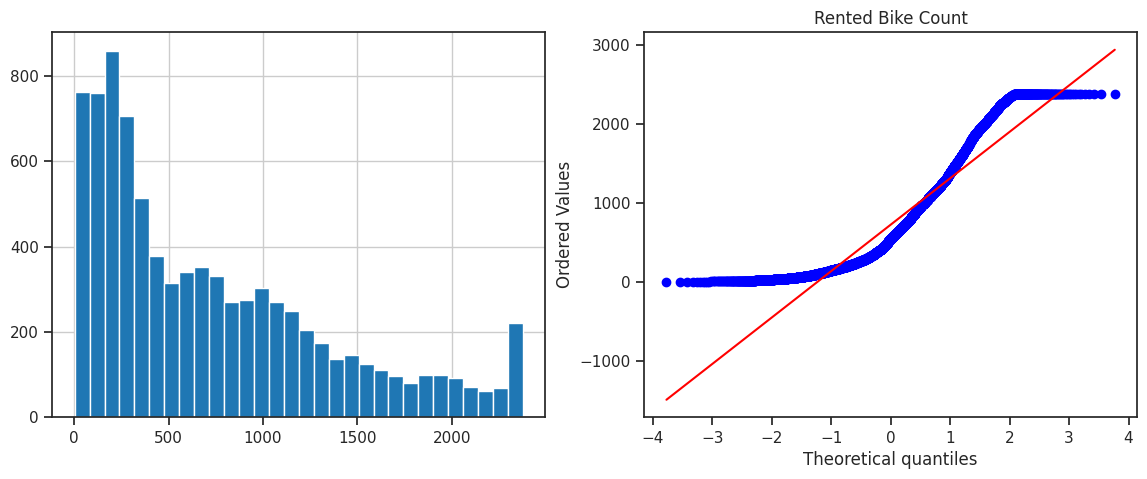

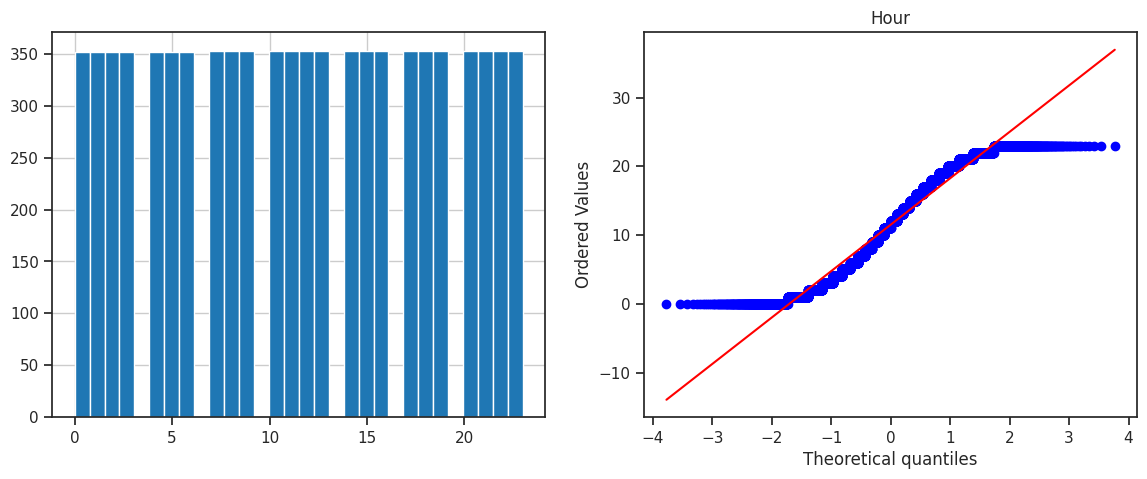

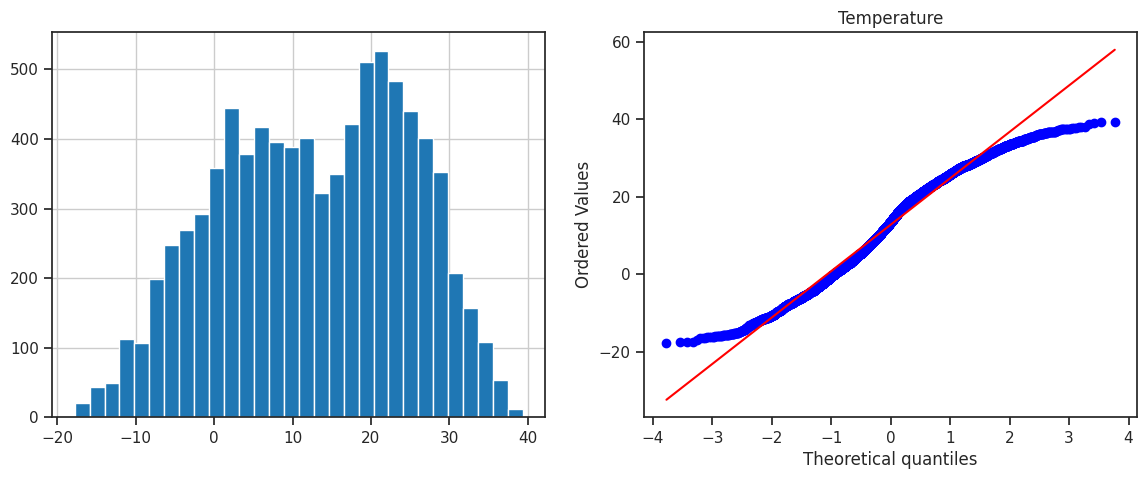

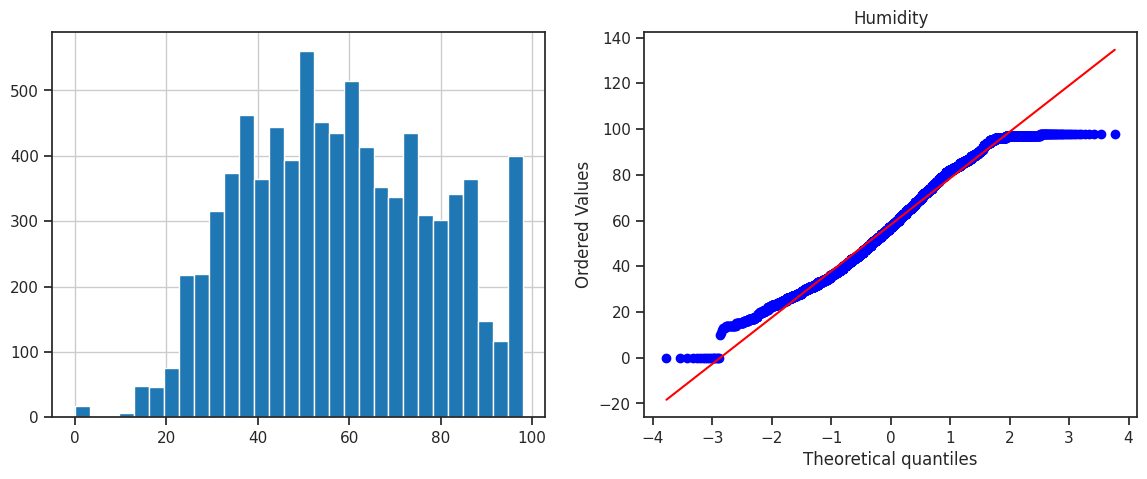

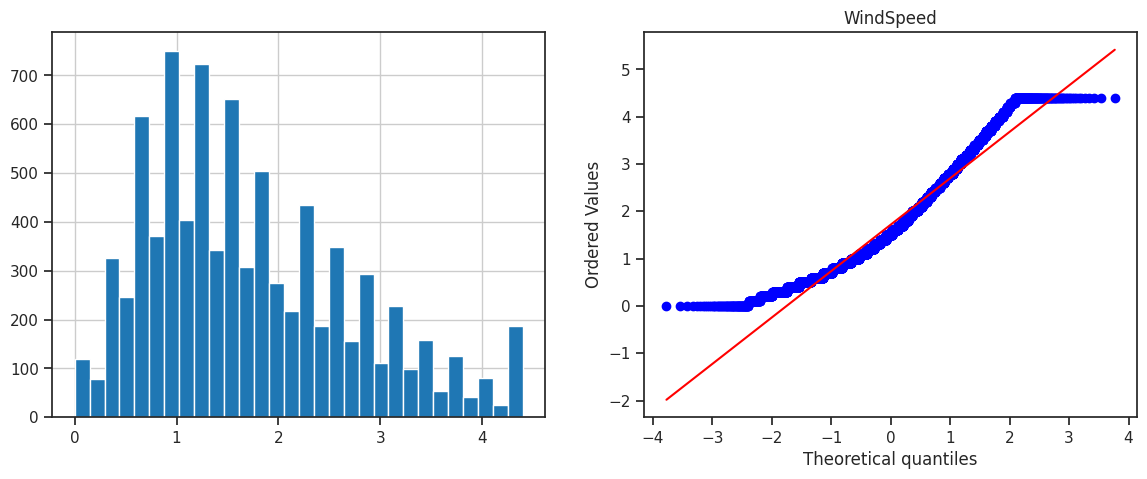

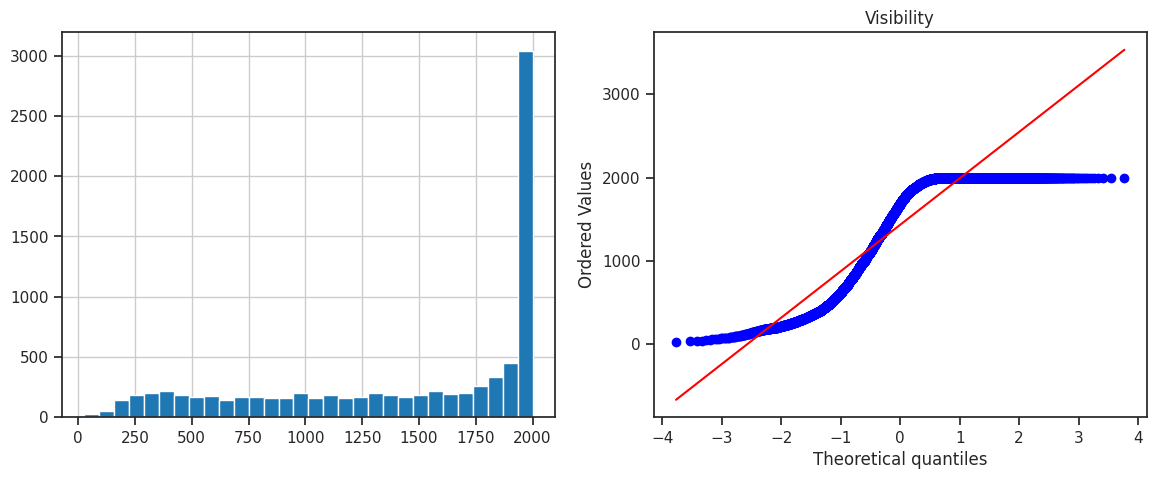

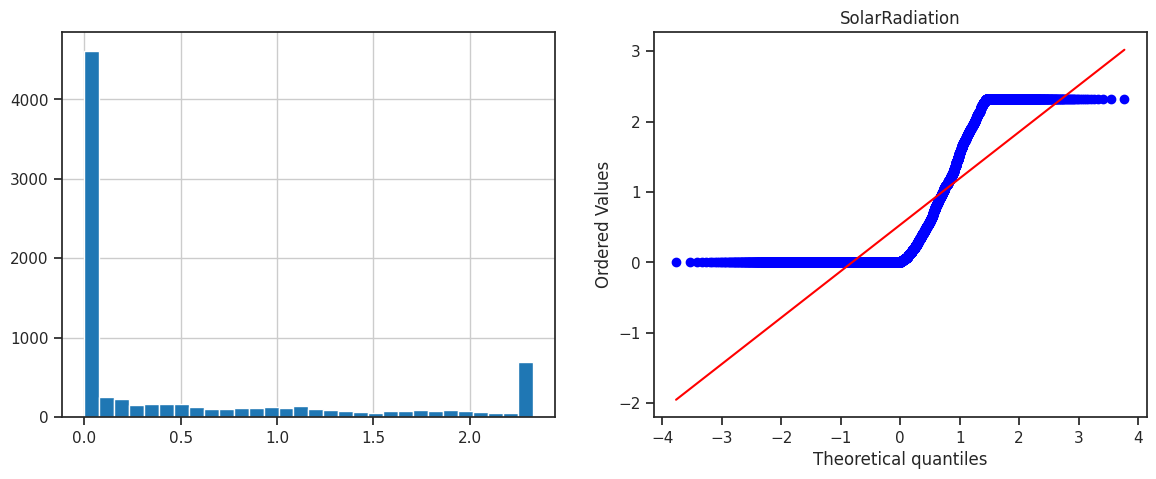

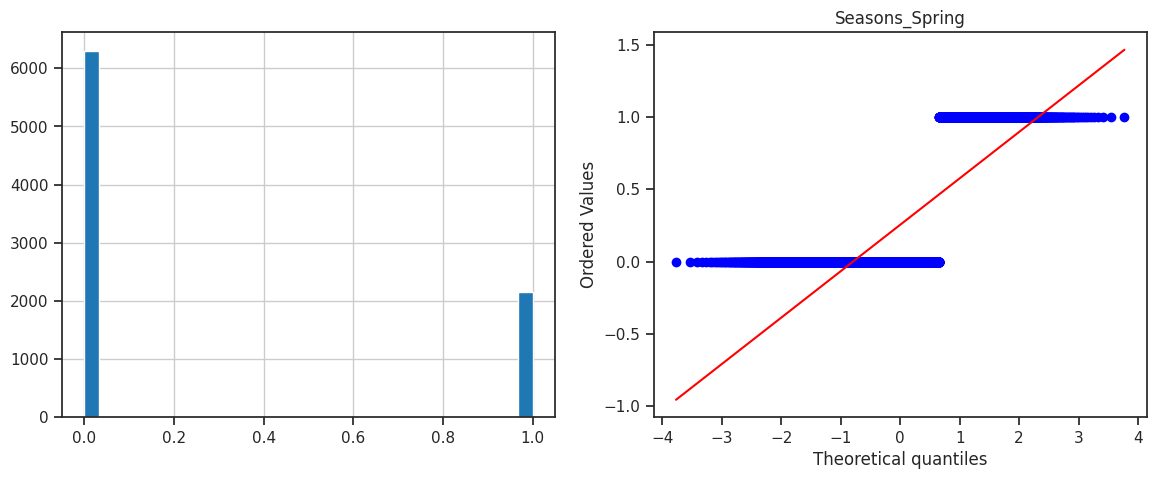

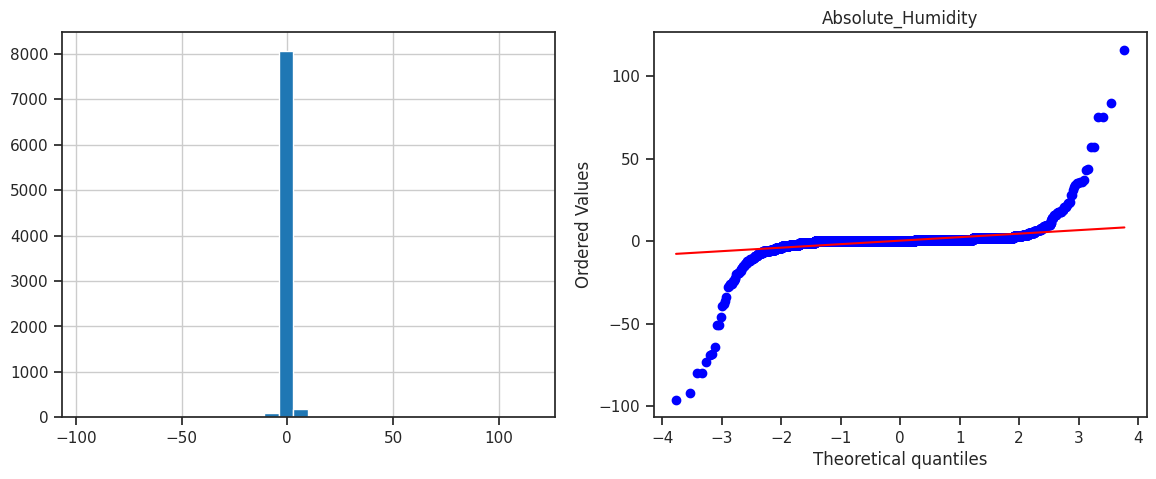

In [76]:
#vizualization
for variable in non_symmetric_feature:
  sns.set_context('notebook')
  plt.figure(figsize=(14,5))
  plt.subplot(1,2,1)   #means 1 row, 2 Columns and 1st plot
  df_removed[variable].hist(bins=30)

  ##QQ plot
  plt.subplot(1,2,2)
  stats.probplot(df_removed[variable], dist='norm',plot=plt)
  plt.title(variable)
  plt.show()
  print('='*120)

Since applying transformation on dependent variable rented bike count, it may affect the interpretability of the model. For example, if applied a log transformation to the dependent variable, the coefficients of the model will be interpreted in terms of the log scale, rather than the original scale.

In [77]:
# Transform Your data
df_removed['WindSpeed']=np.cbrt(df_removed['WindSpeed'])
df_removed['Rented Bike Count']=np.sqrt(df_removed['Rented Bike Count'])


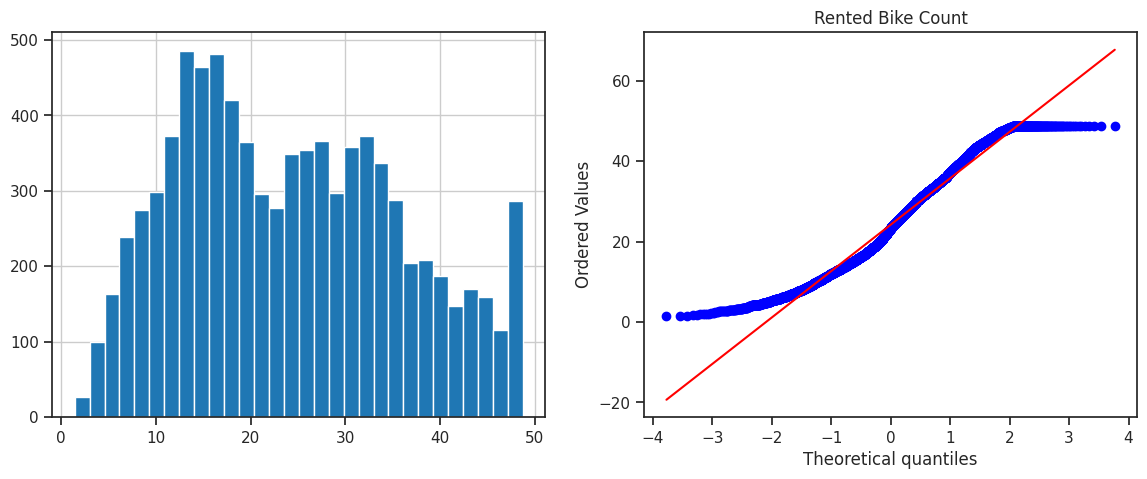

In [78]:
# Visualizing code of hist plot for each columns to know the data distibution
for col in non_symmetric_feature:
  # if (col == 'Wind_speed'):
  if (col == 'WindSspeed') | (col == 'Rented Bike Count'):
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)   #means 1 row, 2 Columns and 1st plot
    df_removed[col].hist(bins=30)

    ##QQ plot
    plt.subplot(1,2,2)
    stats.probplot(df_removed[col], dist='norm',plot=plt)
    plt.title(col)
    plt.show()


Transformed windspeed using cube root and rented bike count with square root and no other transformation required, as for some non symmetric methods when transformation was applied some changed from right to left skewed, hence ignoring transformation.

The purpose of transformation is to convert the values of the dataset's numeric columns to a standard scale without distorting the distinctions between different value ranges or omitting crucial details. Transformation can be achieved using different techniques i.e., either taking log, square root or cuberoot for the value.

>Square-root for moderate skew: sqrt(x) for positively skewed data, sqrt(max(x+1) - x) for negatively skewed data

>log for greater skew: log10(x) for positively skewed data, log10(max(x+1) - x) for negatively skewed data

>inverse for severe skew: 1/x for positively skewed data 1/(max(x+1) - x) for negatively skewed data

>Linearity and heteroscedasticity: First try log transformation in a situation where the dependent variable starts to increase more rapidly with increasing independent variable values If your data does the opposite – dependent variable values decrease more rapidly with increasing independent variable values – you can first consider a square transformation.

### 6. Data Scaling

In [79]:
df_removed.Hour = df_removed.Hour.astype('int')


# Scaling your data
# Checking the data
df_removed.head()


Rented Bike Count  Hour  Temperature  Humidity  WindSpeed  Visibility  \
0              15.94     0        -5.20        37       1.30        2000   
1              14.28     1        -5.50        38       0.93        2000   
2              13.15     2        -6.00        39       1.00        2000   
3              10.34     3        -6.20        40       0.97        2000   
4               8.83     4        -6.00        36       1.32        2000   

   SolarRadiation  Rainfall  Snowfall  Seasons_Spring  Absolute_Humidity  
0            0.00      0.00      0.00               0                  1  
1            0.00      0.00      0.00               0                  1  
2            0.00      0.00      0.00               0                  0  
3            0.00      0.00      0.00               0                  0  
4            0.00      0.00      0.00               0                  0

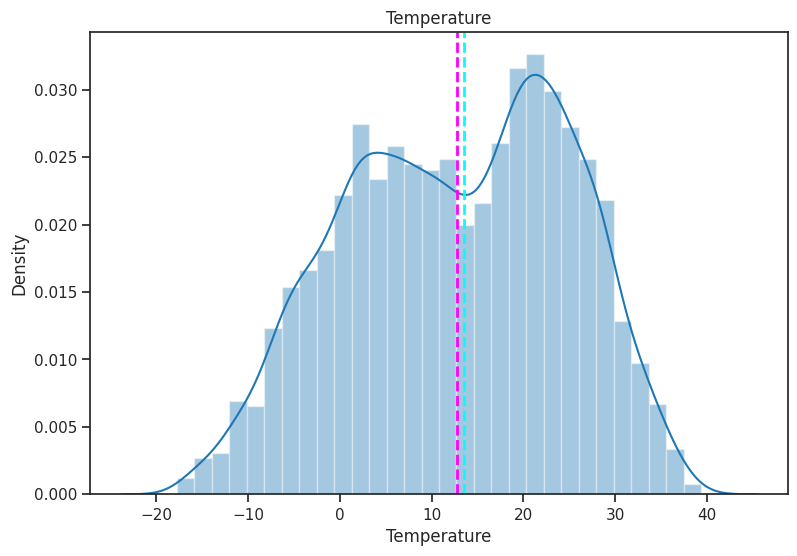

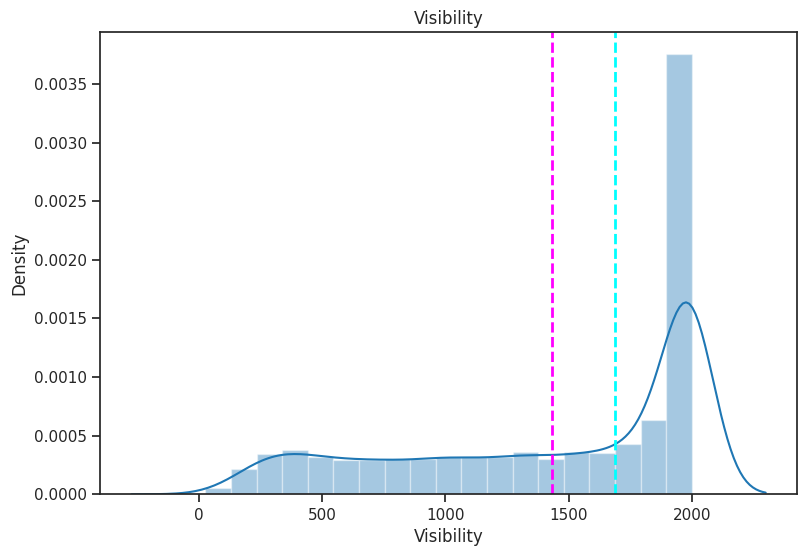

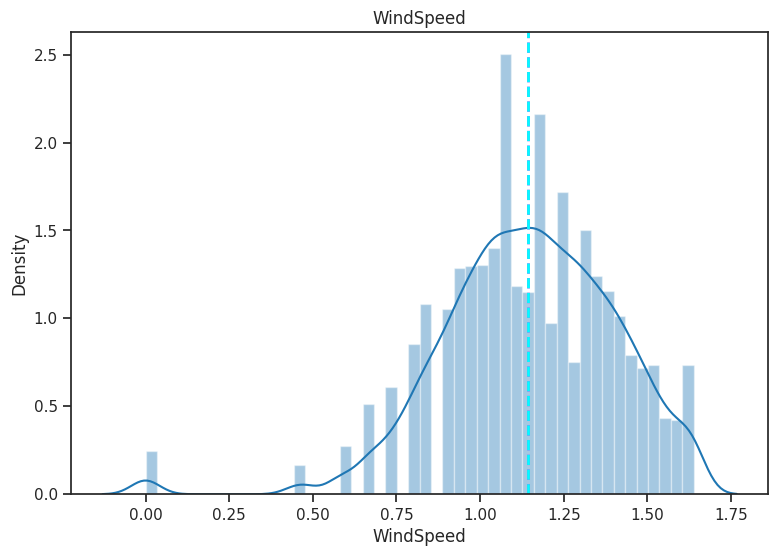

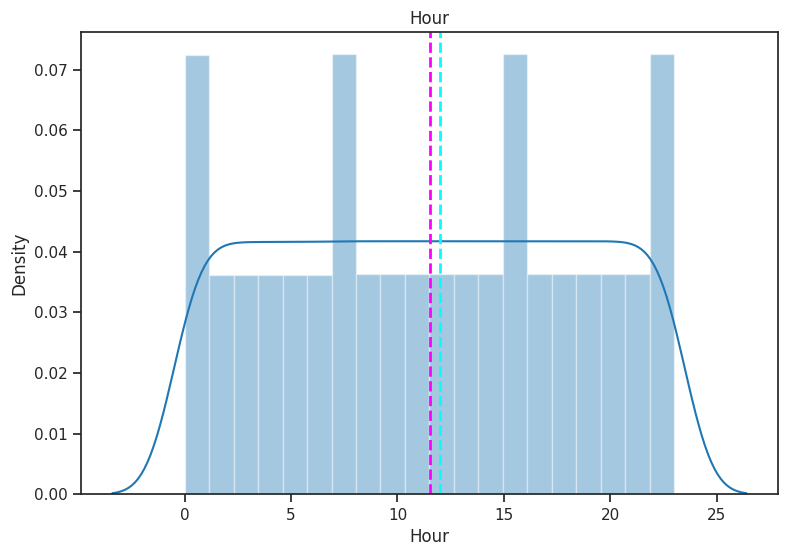

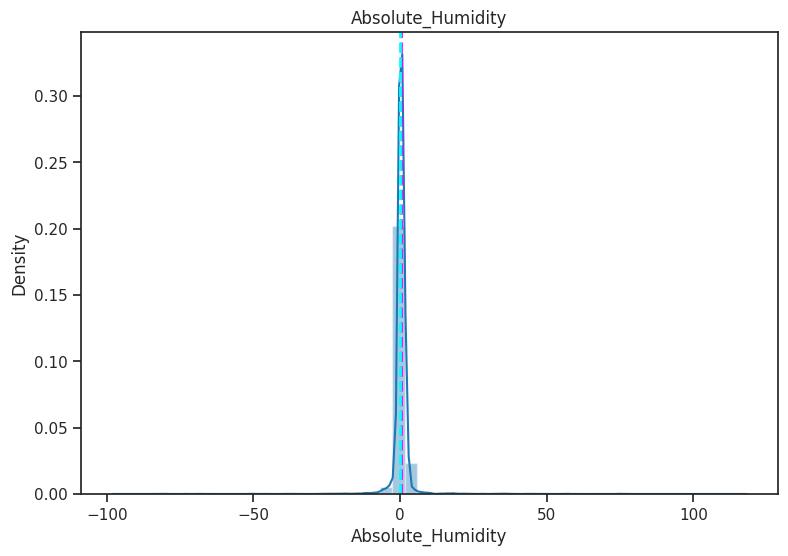

In [80]:
# Visualizing code of hist plot for each columns to know the data distibution
for col in ['Temperature','Visibility','WindSpeed','Hour','Absolute_Humidity']:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df_removed[col])
  sns.distplot(df_removed[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
  plt.show()

In [81]:
df_r = df_removed.copy()
#Transformation
for col in non_symmetric_feature:
  if col == 'Rented_Bike_Count':
    pass
  elif col == 'Wind_speed':
    df_r[col] = StandardScaler().fit_transform(df_r[col].values.reshape(-1, 1))
  else:
    df_r[col] = MinMaxScaler().fit_transform(df_r[col].values.reshape(-1, 1))


df_r.head()

Rented Bike Count  Hour  Temperature  Humidity  WindSpeed  Visibility  \
0               0.31  0.00         0.22      0.38       0.79        1.00   
1               0.27  0.04         0.22      0.39       0.57        1.00   
2               0.25  0.09         0.21      0.40       0.61        1.00   
3               0.19  0.13         0.20      0.41       0.59        1.00   
4               0.16  0.17         0.21      0.37       0.81        1.00   

   SolarRadiation  Rainfall  Snowfall  Seasons_Spring  Absolute_Humidity  
0            0.00      0.00      0.00            0.00               0.46  
1            0.00      0.00      0.00            0.00               0.46  
2            0.00      0.00      0.00            0.00               0.45  
3            0.00      0.00      0.00            0.00               0.45  
4            0.00      0.00      0.00            0.00               0.45

##### Which method have you used to scale you data and why?

When we are using an algorithm that assumes your features have a similar range, we should use feature scaling.

If the ranges of features differ much then we should use feature scaling. If the range does not vary a lot like one of them is between 0 and 2 and the other one is between -1 and 0.5 then we can leave them as it's. However, we should use feature scaling if the ranges are, for example, between -2 and 2 and between -100 and 100.

Use Standardization when your data follows Gaussian distribution. Use Normalization when your data does not follow Gaussian distribution.

So, in my data few of the features were having large difference in distribution, that's why, I have used standardization using standardscaler on windspeed as it showed normal distribution and normalization using minmaxscaler on others.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

This dataset doesnot need any dimensionality reduction.

Dimensionality reduction is a technique that is used to reduce the number of features in a dataset. It is often used when the number of features is very large, as this can lead to problems such as overfitting and slow computation. There are a variety of techniques that can be used for dimensionality reduction, such as principal component analysis (PCA) and singular value decomposition (SVD).

There are several reasons why dimensionality reduction might be useful. One reason is that it can help to reduce the size of a dataset, which can be particularly useful when the dataset is very large. It can also help to improve the performance of machine learning models by reducing the number of features that the model has to consider, which can lead to faster computation and better generalization to new data.

Another reason to use dimensionality reduction is to reduce the curse of dimensionality, which refers to the fact that as the number of dimensions increases, the volume of the space increases exponentially. This can lead to problems such as the nearest neighbor search becoming less effective, as the distances between points become much larger. Dimensionality reduction can help to reduce the curse of dimensionality by reducing the number of dimensions in the data.

Finally, dimensionality reduction can also be useful for visualizing high-dimensional data. It can be difficult to visualize data in more than three dimensions, so reducing the number of dimensions can make it easier to understand the patterns in the data.

In [82]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Not applicable

### 8. Data Splitting

In [83]:
# Split your data to train and test. Choose Splitting ratio wisely.
 # split into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(
    df_r.drop("Rented Bike Count",axis=1),df_r["Rented Bike Count"],
    test_size = 0.3, random_state = 0)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (5925, 10)
Number transactions y_train dataset:  (5925,)
Number transactions X_test dataset:  (2540, 10)
Number transactions y_test dataset:  (2540,)


##### What data splitting ratio have you used and why?

In this case I have used 70:30 split as splitting in any ratio 80/20 or 70/30 deos not affect unless there is less values in dataset. However, there are two competing concerns: with less training data, parameter estimates have greater variance. With less testing data, performance statistic will have greater variance. it is best to divide data such that neither the variance in the training set nor the variance in the test set is too high.

Example : If you have a total of 100 instances, you're probably stuck with cross validation as no single split is going to give you satisfactory variance in your estimates. If you have 100,000 instances, it doesn't really matter whether you choose an 80:20 split or a 90:10 split (indeed you may choose to use less training data if your method is particularly computationally intensive).

80/20 is quite a commonly occurring ratio, often referred to as the Pareto principle. It's usually a safe bet if you use that ratio.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Imbalanced dataset is relevant primarily in the context of supervised machine learning involving two or more classes.

Imbalance means that the number of data points available for different the classes is different: If there are two classes, then balanced data would mean 50% points for each of the class. For most machine learning techniques, little imbalance is not a problem. So, if there are 60% points for one class and 40% for the other class, it should not cause any significant performance degradation. Only when the class imbalance is high, e.g. 90% points for one class and 10% for the other, standard optimization criteria or performance measures may not be as effective and would need modification.

In our case it is not required and imbalanced class like functioning day and holiday are already removed. Secondly, class imbalance applies to classification problems, where the goal is to predict a class label. In a regression problem, where the goal is to predict a continuous numerical target value, class imbalance is generally not a concern.

## ***7. ML Model Implementation***

### ML Model - 1

In [84]:
#ML Model - 1 Implementation
rmodel = LinearRegression()
# Fit the Algorithm
rmodel.fit(X_train, y_train)

LinearRegression()

In [85]:
#score
rmodel.score(X_train, y_train)

0.6057148154227261

In [86]:
# Checking the coefficients
rmodel.coef_

array([ 0.24959736,  0.73727196, -0.2436646 , -0.00888532,  0.01518738,
       -0.03780794, -0.11973152, -0.00359306,  0.01770555, -0.22672573])

In [87]:
# Checking the intercept value
rmodel.intercept_

0.22237015465357773

In [88]:
# Predict on the model
y_pred_train = rmodel.predict(X_train)
y_pred = rmodel.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [89]:
# Metric Score chart for train
r2_train = r2(y_train, y_pred_train)
adj_r2_train = 1-(1-r2(np.square(y_train), np.square(y_pred_train)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_train = mse(y_train, y_pred_train)
RMSE_train = np.sqrt(MSE_train)
MAE_train = mae(y_train, y_pred_train)

In [90]:
# Metric Score chart for test
r2_test = r2(y_test, y_pred)
adj_r2_test = 1-(1-r2(np.square(y_test), np.square(y_pred)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_test = mse(y_test, y_pred)
RMSE_test = np.sqrt(MSE_test)
MAE_test = mae(y_test, y_pred)


In [111]:
data = [
    {
        'Model': 'Linear_Regression',
        'R2_train': r2_train,
        'R2_test': r2_test,
        'Adjusted_R2_train': adj_r2_train,
        'Adjusted_R2_test': adj_r2_test,
        'MAE_train': MAE_train,
        'MAE_test': MAE_test,
        'RMSE_train': RMSE_train,
        'RMSE_test': RMSE_test
    }
]

d1 = pd.DataFrame(data)
d1

Model  R2_train  R2_test  Adjusted_R2_train  Adjusted_R2_test  \
0  Linear_Regression      0.61     0.59               0.54              0.53   

   MAE_train  MAE_test  RMSE_train  RMSE_test  
0       0.12      0.12        0.16       0.16

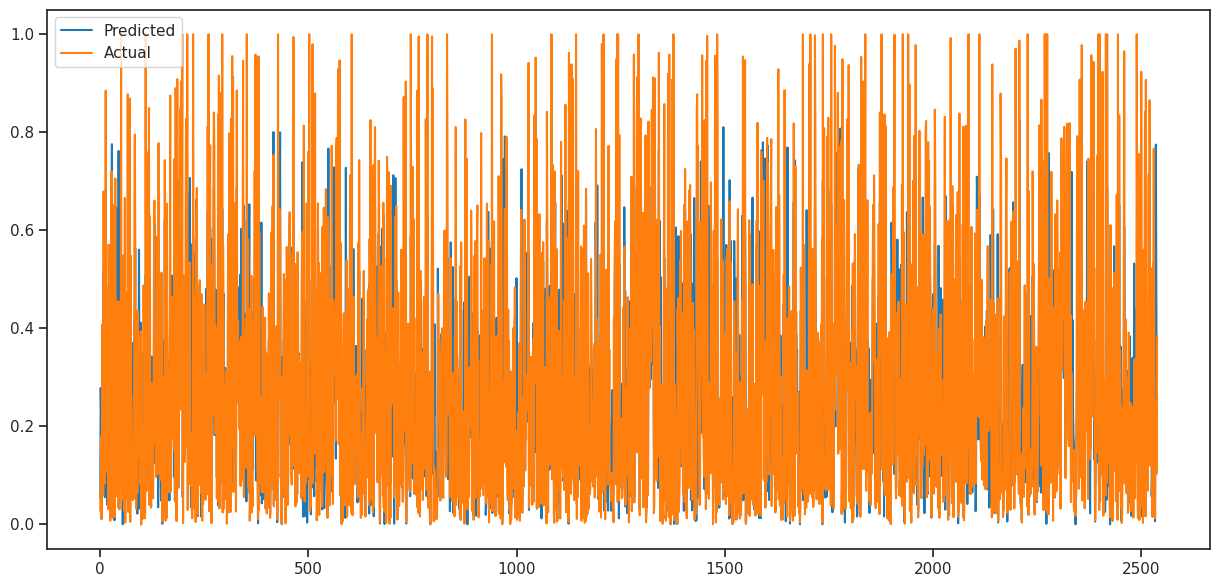

In [92]:
#Visualization
# Plot between actual target variable vs Predicted one
sns.set_context("notebook");
plt.figure(figsize=(15,7))
plt.plot(np.square(y_pred))
plt.plot(np.array(np.square(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [93]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Create the model
model = LinearRegression()

# Define the hyperparameter grid
param_grid = {'normalize': [True, False]}

# Create the grid search object
grid_search = GridSearchCV(model, param_grid, cv=5,scoring = 'r2')

# Fit the grid search object to the training data
grid_search.fit(X_train,y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print(best_params)


ValueError: Invalid parameter 'normalize' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'positive'].

In [ ]:
# Fit the Algorithm

best_model = LinearRegression(normalize=True)

# Fit the best model to the training data
best_model.fit(X_train, y_train)

In [ ]:
# Predict on the model
y_pred_train2 = best_model.predict(X_train)
y_pred2 = best_model.predict(X_test)


In [ ]:
best_model.score(X_train, y_train)

In [ ]:
# Metric Score chart for train
r2_train2 = r2(y_train, y_pred_train2)
adj_r2_train2 = 1-(1-r2(np.square(y_train), np.square(y_pred_train2)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_train2 = mse(y_train, y_pred_train2)
RMSE_train2 = np.sqrt(MSE_train2)
MAE_train2 = mae(y_train, y_pred_train2)

# Metric Score chart for test
r2_test2 = r2(y_test, y_pred2)
adj_r2_test2 = 1-(1-r2(np.square(y_test), np.square(y_pred2)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_test2 = mse(y_test, y_pred2)
RMSE_test2 = np.sqrt(MSE_test2)
MAE_test2 = mae(y_test, y_pred2)

new_row = {
        'Model': 'Linear_Regression_GridCV',
        'R2_train': r2_train2,
        'R2_test': r2_test2,
        'Adjusted_R2_train': adj_r2_train2,
        'Adjusted_R2_test': adj_r2_test2,
        'MAE_train': MAE_train2,
        'MAE_test': MAE_test2,
        'RMSE_train': RMSE_train2,
        'RMSE_test': RMSE_test2
    }
result = result.append(new_row, ignore_index=True)

##### Which hyperparameter optimization technique have you used and why?

Here i chose GridSearchCv for optimization because GridSearchCV is a popular choice for performing hyperparameter tuning and cross-validation in Python because it is easy to use and provides a number of useful features.

Here are a few reasons why I choose to use GridSearchCV for hyperparameter tuning and cross-validation:

* Ease of use: GridSearchCV is designed to be easy to use, and it provides a convenient interface for defining the hyperparameter grid, choosing a cross-validation strategy, and fitting the model.

* Automated hyperparameter tuning: GridSearchCV automates the process of performing hyperparameter tuning, which can save a lot of time and effort compared to manually tuning the hyperparameters of a model.

* Cross-validation: GridSearchCV includes support for cross-validation, which is a key technique for evaluating the generalization performance of a machine learning model. Cross-validation helps to ensure that the model is not overfitting to the training data and is able to generalize to new data.

* Performance evaluation: GridSearchCV provides a number of different evaluation metrics (e.g., accuracy, precision, recall, etc.) that can be used to evaluate the performance of the model, and it allows you to specify which metric you want to use to select the best model.

Overall, GridSearchCV is a powerful and convenient tool for performing hyperparameter tuning and cross-validation in Python. It is widely used in the field of machine learning and is a good choice for many applications.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Since some of the features was left as it was, since on transformation it changed from left to right skew or right to left skew, therefore in gridsearch I used normalise as parameter to check its affect. The result showed best parameter to be normalise as true, therefore no further improvement was observed in the result.

In [ ]:
result

### ML Model - 2 Random Forest Regressor

In [112]:
# ML Model - 2 Implementation
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

# Fit the Algorithm
rf_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data
y_pred_train3 = rf_model.predict(X_train)
y_pred3 = rf_model.predict(X_test)

In [113]:
# Metric Score chart for train
r2_train3 = r2(y_train, y_pred_train3)
adj_r2_train3 = 1-(1-r2(np.square(y_train), np.square(y_pred_train3)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_train3 = mse(y_train, y_pred_train3)
RMSE_train3 = np.sqrt(MSE_train3)
MAE_train3 = mae(y_train, y_pred_train3)

# Metric Score chart for test
r2_test3 = r2(y_test, y_pred3)
adj_r2_test3 = 1-(1-r2(np.square(y_test), np.square(y_pred3)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_test3 = mse(y_test, y_pred3)
RMSE_test3 = np.sqrt(MSE_test3)
MAE_test3 = mae(y_test, y_pred3)

new_row = {
        'Model': 'RandomForestRegressor',
        'R2_train': r2_train3,
        'R2_test': r2_test3,
        'Adjusted_R2_train': adj_r2_train3,
        'Adjusted_R2_test': adj_r2_test3,
        'MAE_train': MAE_train3,
        'MAE_test': MAE_test3,
        'RMSE_train': RMSE_train3,
        'RMSE_test': RMSE_test3
    }
d2=pd.DataFrame(new_row,index=[0])
#result.append(d2,ignore_index=True)
d2

Model  R2_train  R2_test  Adjusted_R2_train  \
0  RandomForestRegressor      0.98     0.86               0.98   

   Adjusted_R2_test  MAE_train  MAE_test  RMSE_train  RMSE_test  
0              0.85       0.02      0.06        0.03       0.09

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

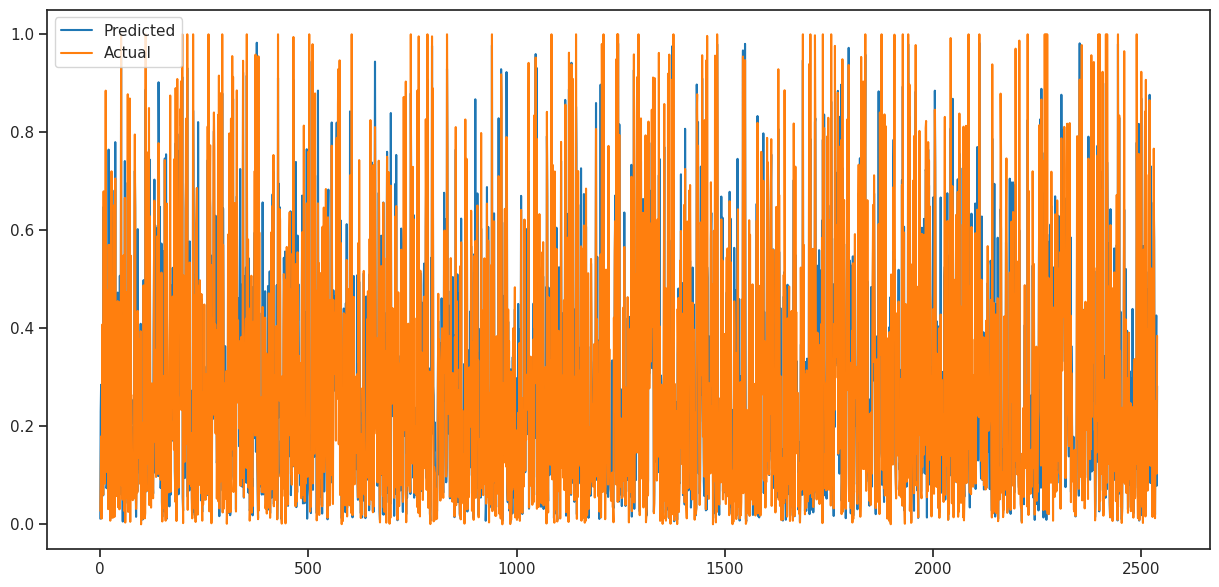

In [114]:
# Visualizing evaluation Metric Score chart
#Visualization
# Plot between actual target variable vs Predicted one
sns.set_context("notebook");
plt.figure(figsize=(15,7))
plt.plot(np.square(y_pred3))
plt.plot(np.array(np.square(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Here I used random forest regressor as seocnd model, i found it to be overfitting since test score was less as compared to train result i.e., r2 score was changed from 0.98 in training to 0.87 in test and relatively higher mean absolute error from 1.01 to 2.82 and root mean squared error changed from 1.50 to 4.13.

Next trying to overcome this error using hyperparameter tunning.

#### 2. Cross- Validation & Hyperparameter Tuning

In [105]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
from sklearn.model_selection import GridSearchCV
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
rf_model = RandomForestRegressor()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

# Fit the Algorithm
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [106]:
#best parameter
print("Best: %f using %s" % (rf_grid.best_score_, rf_grid.best_params_))

Best: 0.817239 using {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 80}


In [107]:
# Predict on the model
# Making predictions on train and test data
y_pred_train4 = rf_grid.predict(X_train)
y_pred4 = rf_grid.predict(X_test)


In [108]:

# Metric Score chart for train
r2_train4 = r2(y_train, y_pred_train4)
adj_r2_train4 = 1-(1-r2(np.square(y_train), np.square(y_pred_train4)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_train4 = mse(y_train, y_pred_train4)
RMSE_train4 = np.sqrt(MSE_train4)
MAE_train4 = mae(y_train, y_pred_train4)

# Metric Score chart for test
r2_test4 = r2(y_test, y_pred4)
adj_r2_test4 = 1-(1-r2(np.square(y_test), np.square(y_pred4)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_test4 = mse(y_test, y_pred4)
RMSE_test4 = np.sqrt(MSE_test4)
MAE_test4 = mae(y_test, y_pred4)

new_row = {
        'Model': 'RandomForestRegressor_Grid_CV',
        'R2_train': r2_train4,
        'R2_test': r2_test4,
        'Adjusted_R2_train': adj_r2_train4,
        'Adjusted_R2_test': adj_r2_test4,
        'MAE_train': MAE_train4,
        'MAE_test': MAE_test4,
        'RMSE_train': RMSE_train4,
        'RMSE_test': RMSE_test4
        }

d3=pd.DataFrame(new_row,index=[0])
d3

Model  R2_train  R2_test  Adjusted_R2_train  \
0  RandomForestRegressor_Grid_CV      0.84     0.81               0.82   

   Adjusted_R2_test  MAE_train  MAE_test  RMSE_train  RMSE_test  
0              0.79       0.07      0.08        0.10       0.11

##### Which hyperparameter optimization technique have you used and why?


GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

Our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Before hyperparameter tuning model was overfitting as model has a very large difference in training and test score, which was reduced from 0.98 in training to 0.84 and test result from 0.87 to 0.81 which is also has slight difference but overall model is efficient now compared to earlier

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

In the context of a linear regression model,I used the following evaluation metrics to assess the performance of the model and the business impact of the model:

* R2 score: The R2 score, also known as the coefficient of determination, is a measure of how well the model fits the data. It ranges from 0 to 1, with a higher value indicating a better fit. A high R2 score suggests that the model is able to explain a large portion of the variance in the data. In a business context, a high R2 score can indicate that the model is able to make accurate predictions, which could have a positive impact on decision-making and resource allocation.

* Adjusted R2 score: The adjusted R2 score is similar to the R2 score, but it adjusts for the number of variables in the model. A higher adjusted R2 score suggests that the model is able to explain a large portion of the variance in the data while also taking into account the complexity of the model. In a business context, a high adjusted R2 score can indicate that the model is able to make accurate predictions with a reasonable level of complexity, which could be more practical for deployment in a business setting.

* Mean absolute error (MAE): The MAE is a measure of the average absolute error of the model's predictions. It is calculated as the sum of the absolute differences between the predicted values and the actual values, divided by the number of predictions. In a business context, a low MAE can indicate that the model is making relatively small errors, which could be important if the model is being used to make important decisions or allocate resources.

* Root mean squared error (RMSE): The RMSE is a measure of the average squared error of the model's predictions. It is calculated as the square root of the mean squared error (MSE). In a business context, a low RMSE can indicate that the model is making relatively small errors, which could be important if the model is being used to make important decisions or allocate resources.

### ML Model - 3

In [94]:
# ML Model - 3 Implementation
# Create an instance of the RandomForestClassifier
xg_model = XGBRegressor(objective= 'reg:squarederror')

# Fit the Algorithm
xg_models=xg_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data

y_pred_train5 = xg_models.predict(X_train)
y_pred5 = xg_models.predict(X_test)

In [97]:
# Metric Score chart for train
r2_train5 = r2(y_train, y_pred_train5)
adj_r2_train5 = 1-(1-r2(np.square(y_train), np.square(y_pred_train5)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_train5 = mse(y_train, y_pred_train5)
RMSE_train5 = np.sqrt(MSE_train5)
MAE_train5 = mae(y_train, y_pred_train5)

# Metric Score chart for test
r2_test5 = r2(y_test, y_pred5)
adj_r2_test5 = 1-(1-r2(np.square(y_test), np.square(y_pred5)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_test5 = mse(y_test, y_pred5)
RMSE_test5 = np.sqrt(MSE_test5)
MAE_test5 = mae(y_test, y_pred5)

new_row = {
        'Model': 'XGBRegressor',
        'R2_train': r2_train5,
        'R2_test': r2_test5,
        'Adjusted_R2_train': adj_r2_train5,
        'Adjusted_R2_test': adj_r2_test5,
        'MAE_train': MAE_train5,
        'MAE_test': MAE_test5,
        'RMSE_train': RMSE_train5,
        'RMSE_test': RMSE_test5
    }

d4=pd.DataFrame(new_row,index=[0])

Model  R2_train  R2_test  Adjusted_R2_train  Adjusted_R2_test  \
0  XGBRegressor      0.97     0.86               0.97              0.85   

   MAE_train  MAE_test  RMSE_train  RMSE_test  
0       0.03      0.07        0.04       0.09

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [98]:
# Visualizing evaluation Metric Score chart
d4

Model  R2_train  R2_test  Adjusted_R2_train  Adjusted_R2_test  \
0  XGBRegressor      0.97     0.86               0.97              0.85   

   MAE_train  MAE_test  RMSE_train  RMSE_test  
0       0.03      0.07        0.04       0.09

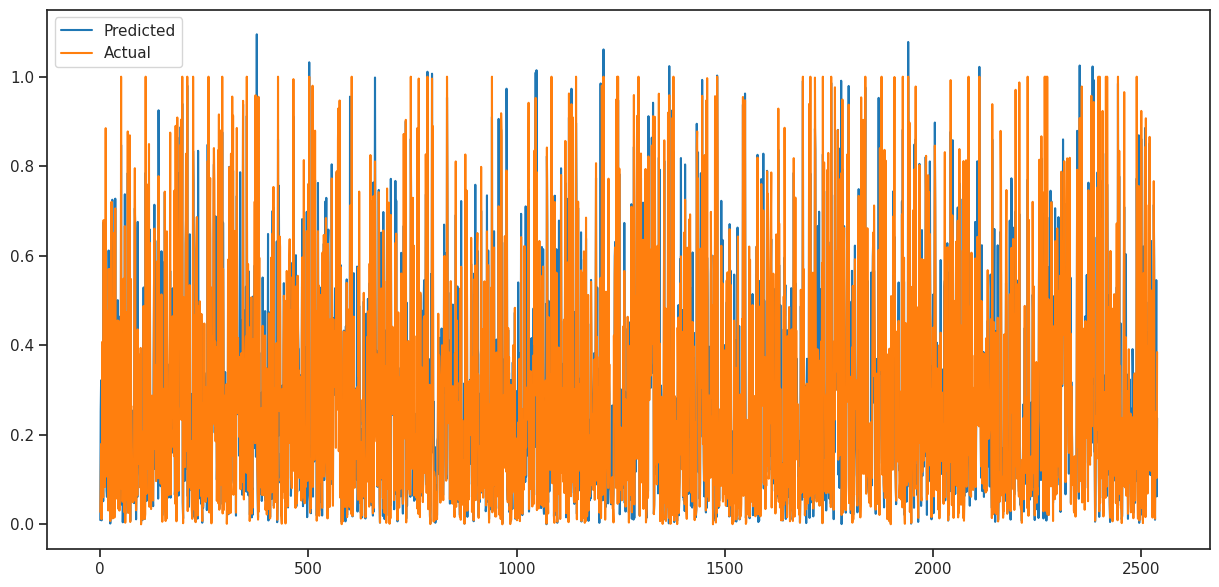

In [99]:
#Visualization
# Plot between actual target variable vs Predicted one
sns.set_context("notebook");
plt.figure(figsize=(15,7))
plt.plot(np.square(y_pred5))
plt.plot(np.array(np.square(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Here I used XGBRegressor as the model, it show high r2 and low MAE and RMSE score that r2 as 0.85, mae as 3.27 and rmse as 4.11. However there is difference in test and training score which i will try to recover using hyperparameter tuning.

#### 2. Cross- Validation & Hyperparameter Tuning

In [100]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
xg_model = XGBRegressor(objective = 'reg:squarederror')

# Fit the Algorithm
# Grid search
xg_grid = GridSearchCV(estimator=xg_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='r2')

xg_grid1=xg_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.1s
[CV] END max_depth=4, min_sam

In [101]:
# Predict on the model
# Making predictions on train and test data

y_pred_train6= xg_grid1.predict(X_train)
y_pred6 = xg_grid1.predict(X_test)

In [103]:
# Metric Score chart for train
r2_train6 = r2(y_train, y_pred_train6)
adj_r2_train6 = 1-(1-r2(np.square(y_train), np.square(y_pred_train6)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_train6 = mse(y_train, y_pred_train6)
RMSE_train6 = np.sqrt(MSE_train6)
MAE_train6 = mae(y_train, y_pred_train6)

# Metric Score chart for test
r2_test6 = r2(y_test, y_pred6)
adj_r2_test6 = 1-(1-r2(np.square(y_test), np.square(y_pred6)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_test6 = mse(y_test, y_pred6)
RMSE_test6 = np.sqrt(MSE_test6)
MAE_test6 = mae(y_test, y_pred6)

new_row = {
        'Model': 'XGBRegressor_GridCV',
        'R2_train': r2_train6,
        'R2_test': r2_test6,
        'Adjusted_R2_train': adj_r2_train6,
        'Adjusted_R2_test': adj_r2_test6,
        'MAE_train': MAE_train6,
        'MAE_test': MAE_test6,
        'RMSE_train': RMSE_train6,
        'RMSE_test': RMSE_test6
    }
d5=pd.DataFrame(new_row,index=[0])

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these



best sets of hyperparameters? One can try the Manual Search method, by using



the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [104]:
#result
d5

Model  R2_train  R2_test  Adjusted_R2_train  \
0  XGBRegressor_GridCV      0.95     0.86               0.94   

   Adjusted_R2_test  MAE_train  MAE_test  RMSE_train  RMSE_test  
0              0.85       0.04      0.07        0.06       0.09

Hyperparameter tunning certainly showed a better result, r2 was increased from 0.85 to 0.88 on test and mae and rmse was lowered. Mae reduced from 3.27 to 2.73 and rmse from 4.11 to 2.66. Overall model show good result.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For the model and business point of view, I chose R2 abd RMSE as evaluation metrics.

* R2 score, also known as the coefficient of determination, is a measure of how well the model fits the data. It ranges from 0 to 1, with a higher value indicating a better fit. A high R2 score suggests that the model is able to explain a large portion of the variance in the data. In a business context, a high R2 score can indicate that the model is able to make accurate predictions, which could have a positive impact on decision-making and resource allocation.

* RMSE is a measure of the average squared error of the model's predictions. It is calculated as the square root of the mean squared error (MSE). In a business context, a low RMSE can indicate that the model is making relatively small errors, which could be important if the model is being used to make important decisions or allocate resources.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Based on the results, I want to consider using the XGBRegressor_GridCV i.e., XGBRegressor with hyperparameter tunned model as final model. This model has the highest R2 values on both the training and test sets, which indicates that it is doing a good job of explaining the variance in the target variable. It also has the lowest MAE and RMSE values on the test set, which means that it is making relatively small and accurate predictions

In [122]:
framelist=[d1,d2,d3,d4,d5]
result=pd.concat(framelist,ignore_index=True)
result

Model  R2_train  R2_test  Adjusted_R2_train  \
0              Linear_Regression      0.61     0.59               0.54   
1          RandomForestRegressor      0.98     0.86               0.98   
2  RandomForestRegressor_Grid_CV      0.84     0.81               0.82   
3                   XGBRegressor      0.97     0.86               0.97   
4            XGBRegressor_GridCV      0.95     0.86               0.94   

   Adjusted_R2_test  MAE_train  MAE_test  RMSE_train  RMSE_test  
0              0.53       0.12      0.12        0.16       0.16  
1              0.85       0.02      0.06        0.03       0.09  
2              0.79       0.07      0.08        0.10       0.11  
3              0.85       0.03      0.07        0.04       0.09  
4              0.85       0.04      0.07        0.06       0.09

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [123]:
#Get shap values
explainer = shap.Explainer(xg_models)
shap_values = explainer(X_test)


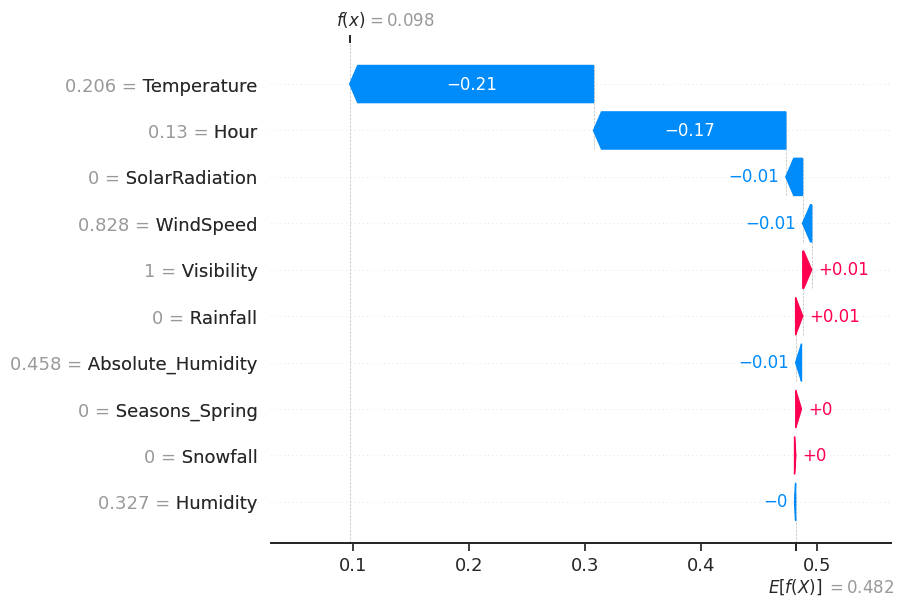

In [124]:
# Waterfall plot for first observation
shap.plots.waterfall(shap_values[0])

Above we have the code to create a waterfall plot for the first abalone in our dataset. This plot helps us visualise the SHAP values for each of the features. These tell us how much each of the features have increased or decreased the predicted number of rings for this specific abalone.

Looking at the x-axis, we can see the base value is E[f(x)] = 24.214. This is the average predicted number of rings across all abalones. The ending value is f(x) = 7.511. The SHAP values are all the values in between.

There will be a unique waterfall plot for every observation/abalone in our dataset. They can all be interpreted in the same way as above. In each case, the SHAP values tell us how much each factor contributed to the model’s prediction when compared to the mean prediction. Large positive/negative SHAP values indicate that the feature had a significant impact on the model’s prediction.

In [125]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Forceplot for first observation
shap.plots.force(shap_values[0])

Another way to visualise SHAP values is using a force plot. These give us pretty much the same information as a waterfall plot in a straight line how the geatures are contributiong and the relationship between the features. If one value value increases res will compress.

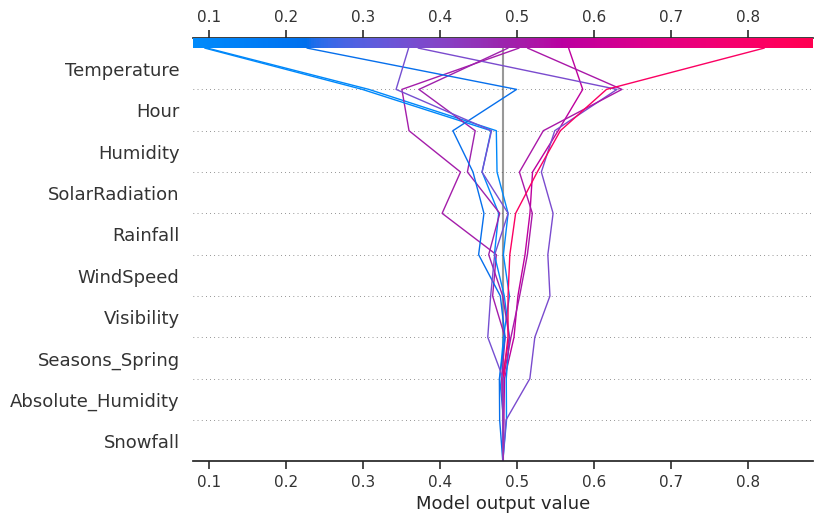

In [126]:
# Get expected value and shap values array
expected_value = explainer.expected_value
shap_array = explainer.shap_values(X_test)

#Descion plot for first 10 observations
shap.decision_plot(expected_value, shap_array[0:10],feature_names=list(X_test.columns))

Waterfall and force plots are great for interpreting individual predictions. To understand how our model makes predictions in general we need to aggregate the SHAP values. One way to do this is using a decision plot. Above we have the code used to output the decision plot for the first 10 abalones.

we can see there are 10 lines in the plot —one for each abalone. They all start at the same base value of 24.21 and end at their final predicted number of rings. As you move up from each feature on the y-axis, the movement on the x-axis is given by the SHAP value for that feature. Ultimately, this gives you similar information to a waterfall plot except we can now see it for multiple observations.

With only 10 observations, we can already see some trends. For example, some of the lines seem to zig-zag at the top of the chart. For these observations, the shucked weight increases the prediction (i.e. positive SHAP) and the shell weight and whole weight decrease the prediction (i.e. negative SHAP). In other words, these features have opposite effects on the prediction. When we look at plot 5 — beeswarm, we will see that this is the case for the model in general.

An issue with this chart is that we can’t use it to visualise all the SHAP values at once. As you increase the number of observations it will become too cluttered and it will be difficult to gain any understanding of how the model works. We are limited to interpreting the SHAP values for a handful of observations.

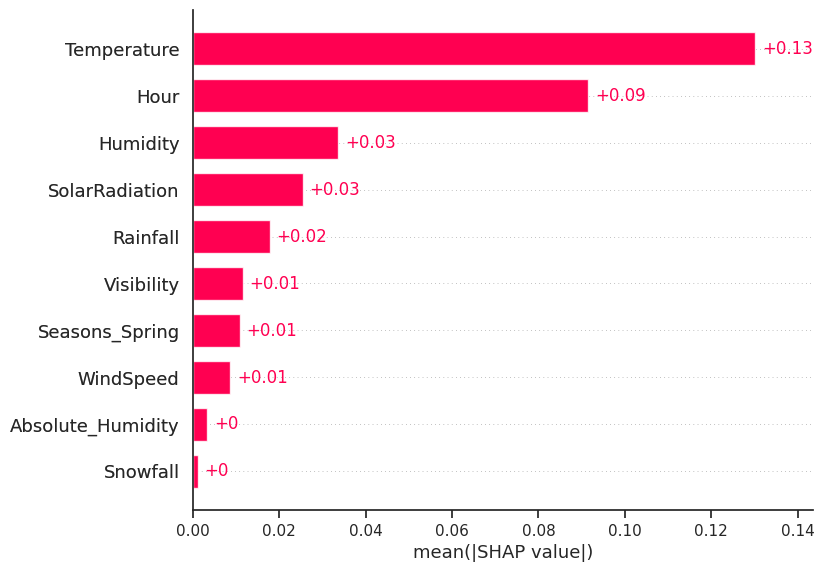

In [127]:
#Mean SHAP
shap.plots.bar(shap_values)

Another way to aggregate the values is using a mean SHAP plot. For each feature, we calculate the mean of the absolute SHAP values across all observations. We take the absolute values as we do not want positive and negative values to offset each other. In the end, we have the bar plot above. There is one bar for each feature and we can see that shell weight had the largest mean SHAP out of all the features.

Features that have large mean SHAP values will tend to have large positive/negative SHAP values. In other words, these are the features that have a significant impact on the model’s predictions. In this sense, this plot can be used in the same way as a feature importance plot. That is to highlight features that are important to a model’s predictions. An issue is that it does not tell us anything about the nature of the relationship between features and the target variable.

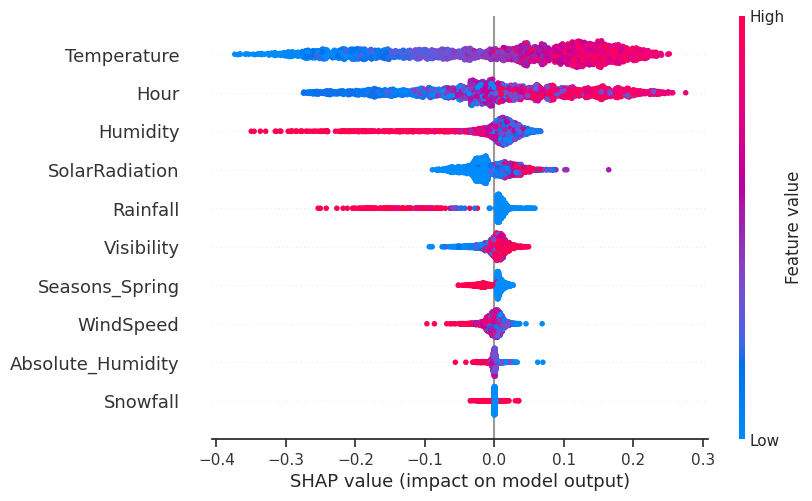

In [128]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)


Our final aggregation is the beeswarm plot. As seen in Figure, this is a plot of all the SHAP values. The values are grouped by the features on the y-axis. For each group, the colour of the points is determined by the value of the same feature (i.e. higher feature values are redder). The features are ordered by the mean SHAP values.

This plot addresses some of the issues in the previous plots. Unlike the decision plot, we can plot all the observations and still have clear interpretations. Like mean SHAP, it can be used to highlight important relationships. We can also start to understand the nature of these relationships.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***